# This project implemented by Elham Mahdipour
## She is a Ph.D. Candidate of computer engineering at Yazd University, Yazd, Iran.
### Please feel free and contact to me: elham.mahdipour@gmail.com/ elham.mahdipour@stu.yazd.ac.ir

# Phase 1 
## Create Dataset and Preprocessing

In [1]:
import networkx as nx
G1=nx.read_leda('biogrid samples\scerevisiae.gw')
G1

In [2]:
G2=nx.read_leda('biogrid samples\AThaliana.gw')
G2

In [3]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

5831
5897


In [4]:
G_target_na=nx.read_weighted_edgelist('biogrid samples\sc-AT.tsv')
G_target_na  

In [5]:
len(G_target_na)

1440

In [6]:
ed1=G1.edges()
ed2=G2.edges()

nd1=G1.nodes()
nd2=G2.nodes()

el1=list(ed1)
el2=list(ed2)

nd1=list(nd1)
nd2=list(nd2)

degG1 = [val for (node, val) in G1.degree()]
degG2 = [val for (node, val) in G2.degree()]

# Feature Extraction

# compute score for create similarity matrix

In [7]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [8]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [9]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [10]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node

In [11]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [12]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [16]:
elt=G_target_na.edges()
elt=list(elt)
elt

[('850996', '833987'),
 ('854309', '834370'),
 ('850997', '840114'),
 ('850998', '819918'),
 ('855386', '829969'),
 ('851342', '844228'),
 ('853757', '821995'),
 ('855723', '831311'),
 ('852439', '820937'),
 ('855104', '834747'),
 ('852383', '832836'),
 ('851954', '829838'),
 ('851065', '831077'),
 ('852456', '843098'),
 ('851098', '825755'),
 ('851102', '814698'),
 ('851582', '837733'),
 ('855474', '817673'),
 ('852665', '826665'),
 ('855428', '821628'),
 ('853371', '817259'),
 ('856402', '837734'),
 ('856413', '825385'),
 ('851117', '830044'),
 ('854986', '839636'),
 ('851125', '825833'),
 ('851631', '835714'),
 ('854025', '844399'),
 ('856815', '820218'),
 ('854070', '839916'),
 ('856434', '819849'),
 ('852231', '820293'),
 ('851139', '828392'),
 ('856462', '836220'),
 ('856466', '839521'),
 ('856467', '824778'),
 ('856473', '841952'),
 ('856474', '826596'),
 ('851114', '823849'),
 ('856844', '844406'),
 ('854930', '835835'),
 ('850505', '837023'),
 ('850369', '830541'),
 ('854844',

In [45]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=(nd1[i],nd2[j]) in elt
            if q1==False:
                c=0
            else:
               # print(q1)
                c=1
            seq[i][j]=c    
            
    return seq

In [46]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s,coeff_pr, dd, cd, seq_sc

In [47]:
import numpy as np
m, coeff_pr, dd, cd, seq=compute_score(G1,G2)
sim=m

In [49]:
for i in range(len(el1)):
    if '850996' in el1[i][0] or '850996' in el1[i][1]:
        print('True in i:',i, el1[i])

True in i: 20079 ('853896', '850996')
True in i: 28586 ('850786', '850996')
True in i: 48261 ('853986', '850996')
True in i: 68287 ('855933', '850996')
True in i: 76714 ('850996', '855466')


In [58]:
count=0
for i in range(len(el2)):
    for j in range(len(elt)):
        if elt[j][1] in el2[i][0] or elt[j][1] in el2[i][1]:
            print('True in i:',i,j,  el2[i])
            count+=1
print(count)

True in i: 14 691 ('839241', '839789')
True in i: 27 553 ('839241', '822324')
True in i: 66 104 ('817013', '821531')
True in i: 67 252 ('817014', '836733')
True in i: 87 608 ('842284', '835157')
True in i: 98 655 ('831230', '828238')
True in i: 99 655 ('831230', '838650')
True in i: 100 655 ('831230', '822695')
True in i: 101 655 ('831230', '844075')
True in i: 102 655 ('831230', '815008')
True in i: 103 655 ('831230', '838927')
True in i: 104 655 ('831230', '838046')
True in i: 105 655 ('831230', '832620')
True in i: 106 655 ('831230', '830439')
True in i: 107 655 ('831230', '818827')
True in i: 108 211 ('831230', '844213')
True in i: 108 655 ('831230', '844213')
True in i: 109 655 ('831230', '832216')
True in i: 110 366 ('831230', '821544')
True in i: 110 655 ('831230', '821544')
True in i: 111 655 ('831230', '841014')
True in i: 112 655 ('831230', '817341')
True in i: 113 655 ('831230', '817340')
True in i: 114 655 ('831230', '830502')
True in i: 115 384 ('831230', '832705')
True in

True in i: 3086 39 ('818069', '844406')
True in i: 3086 642 ('818069', '844406')
True in i: 3103 688 ('826998', '823970')
True in i: 3123 357 ('830027', '822195')
True in i: 3174 442 ('835813', '839135')
True in i: 3175 663 ('835813', '836519')
True in i: 3199 39 ('827480', '844406')
True in i: 3201 66 ('823812', '831666')
True in i: 3255 211 ('829463', '844213')
True in i: 3258 357 ('829463', '822195')
True in i: 3259 384 ('829463', '832705')
True in i: 3262 272 ('829463', '820356')
True in i: 3269 688 ('829463', '823970')
True in i: 3273 357 ('829462', '822195')
True in i: 3301 472 ('830807', '839305')
True in i: 3311 544 ('840123', '815134')
True in i: 3314 594 ('840123', '834492')
True in i: 3325 688 ('840123', '823970')
True in i: 3340 211 ('826468', '844213')
True in i: 3345 679 ('829882', '824605')
True in i: 3351 39 ('818905', '844406')
True in i: 3373 39 ('816940', '844406')
True in i: 3374 39 ('816943', '844406')
True in i: 3383 646 ('842178', '836156')
True in i: 3410 582 ('

True in i: 6435 234 ('837683', '824036')
True in i: 6450 711 ('837423', '824750')
True in i: 6451 711 ('837423', '827331')
True in i: 6452 711 ('837423', '821259')
True in i: 6457 157 ('830439', '819756')
True in i: 6462 688 ('830439', '823970')
True in i: 6485 39 ('816808', '844406')
True in i: 6493 544 ('815134', '834492')
True in i: 6493 594 ('815134', '834492')
True in i: 6494 544 ('815134', '835298')
True in i: 6495 544 ('815134', '832824')
True in i: 6496 544 ('815134', '834940')
True in i: 6497 544 ('815134', '831847')
True in i: 6498 544 ('815134', '838687')
True in i: 6499 544 ('815134', '843272')
True in i: 6500 544 ('815134', '823970')
True in i: 6500 688 ('815134', '823970')
True in i: 6521 349 ('842393', '814702')
True in i: 6522 349 ('842393', '819626')
True in i: 6523 349 ('842393', '832453')
True in i: 6524 349 ('842393', '831191')
True in i: 6525 663 ('843693', '836519')
True in i: 6536 472 ('843526', '839305')
True in i: 6539 688 ('843528', '823970')
True in i: 6540 2

True in i: 8488 51 ('832216', '842993')
True in i: 8490 234 ('832216', '824036')
True in i: 8498 39 ('832213', '844406')
True in i: 8498 274 ('832213', '844406')
True in i: 8500 109 ('839868', '822396')
True in i: 8505 39 ('839869', '844406')
True in i: 8516 57 ('817676', '823805')
True in i: 8517 57 ('817676', '824542')
True in i: 8527 688 ('820025', '823970')
True in i: 8559 254 ('836517', '838127')
True in i: 8560 254 ('836517', '837249')
True in i: 8561 357 ('822195', '816192')
True in i: 8562 357 ('822195', '842082')
True in i: 8563 152 ('822195', '825817')
True in i: 8563 357 ('822195', '825817')
True in i: 8564 357 ('822195', '817423')
True in i: 8565 357 ('822195', '820851')
True in i: 8566 357 ('822195', '828938')
True in i: 8567 357 ('822195', '824161')
True in i: 8568 357 ('822195', '818455')
True in i: 8569 357 ('822195', '827661')
True in i: 8569 392 ('822195', '827661')
True in i: 8570 272 ('822195', '820356')
True in i: 8570 357 ('822195', '820356')
True in i: 8571 357 (

True in i: 11519 601 ('828134', '828791')
True in i: 11525 392 ('831847', '827661')
True in i: 11528 234 ('831847', '824036')
True in i: 11536 39 ('841454', '844406')
True in i: 11554 606 ('843178', '821339')
True in i: 11555 39 ('844169', '844406')
True in i: 11566 234 ('843357', '824036')
True in i: 11573 39 ('840916', '844406')
True in i: 11597 688 ('819857', '823970')
True in i: 11604 306 ('838935', '844224')
True in i: 11637 272 ('832766', '820356')
True in i: 11650 234 ('836861', '824036')
True in i: 11668 290 ('831071', '825253')
True in i: 11678 39 ('820335', '844406')
True in i: 11694 606 ('827103', '821339')
True in i: 11704 617 ('829300', '832586')
True in i: 11713 234 ('844377', '824036')
True in i: 11761 688 ('818938', '823970')
True in i: 11764 234 ('819082', '824036')
True in i: 11766 667 ('835609', '824956')
True in i: 11777 189 ('822556', '838771')
True in i: 11785 688 ('831518', '823970')
True in i: 11792 212 ('827493', '837490')
True in i: 11798 39 ('838050', '844406

In [60]:
count=0
for i in range(len(el1)):
    for j in range(len(elt)):
        if elt[j][0] in el1[i][0] or elt[j][0] in el1[i][1]:
            print('True in i:',i,j,  el1[i])
            count+=1
print(count)

True in i: 0 426 ('9164920', '852982')
True in i: 5 651 ('9164920', '852704')
True in i: 8 658 ('9164920', '854165')
True in i: 9 361 ('9164920', '855649')
True in i: 12 133 ('9164920', '855884')
True in i: 13 369 ('9164920', '854381')
True in i: 15 328 ('9164921', '854213')
True in i: 16 431 ('9164921', '855068')
True in i: 20 253 ('9164921', '852995')
True in i: 32 565 ('9164922', '850427')
True in i: 33 328 ('9164923', '854213')
True in i: 35 225 ('9164923', '850883')
True in i: 40 165 ('9164925', '850872')
True in i: 41 256 ('9164925', '852013')
True in i: 47 626 ('9164925', '851319')
True in i: 50 658 ('9164925', '854165')
True in i: 56 19 ('855428', '856743')
True in i: 57 19 ('855428', '852984')
True in i: 58 19 ('855428', '854940')
True in i: 59 19 ('855428', '851394')
True in i: 59 521 ('855428', '851394')
True in i: 60 19 ('855428', '856155')
True in i: 61 19 ('855428', '850395')
True in i: 62 19 ('855428', '855633')
True in i: 63 19 ('855428', '854458')
True in i: 64 19 ('85

True in i: 459 451 ('853118', '854827')
True in i: 460 451 ('853118', '852378')
True in i: 461 451 ('853118', '850875')
True in i: 462 451 ('853118', '850554')
True in i: 462 661 ('853118', '850554')
True in i: 463 451 ('853118', '851369')
True in i: 464 451 ('853118', '851504')
True in i: 464 669 ('853118', '851504')
True in i: 465 451 ('853118', '850594')
True in i: 466 451 ('853118', '850590')
True in i: 467 451 ('853118', '856607')
True in i: 467 631 ('853118', '856607')
True in i: 468 202 ('853118', '850620')
True in i: 468 451 ('853118', '850620')
True in i: 469 451 ('853118', '853167')
True in i: 470 87 ('853118', '856758')
True in i: 470 451 ('853118', '856758')
True in i: 471 451 ('853118', '854669')
True in i: 472 451 ('853118', '852344')
True in i: 473 451 ('853118', '856351')
True in i: 474 451 ('853118', '855535')
True in i: 475 451 ('853118', '853670')
True in i: 476 451 ('853118', '853635')
True in i: 477 707 ('853119', '853686')
True in i: 478 707 ('853119', '854144')
T

True in i: 1212 661 ('851162', '850554')
True in i: 1219 301 ('851162', '850298')
True in i: 1227 202 ('851162', '850620')
True in i: 1250 176 ('851162', '853471')
True in i: 1259 644 ('851162', '854229')
True in i: 1261 262 ('851162', '851493')
True in i: 1266 206 ('851162', '855514')
True in i: 1278 675 ('851162', '853318')
True in i: 1279 529 ('851162', '850422')
True in i: 1283 491 ('851162', '856846')
True in i: 1290 280 ('851162', '853956')
True in i: 1297 202 ('851161', '850620')
True in i: 1298 427 ('851161', '850973')
True in i: 1300 364 ('851161', '851770')
True in i: 1309 223 ('851160', '856552')
True in i: 1319 119 ('851160', '852215')
True in i: 1327 46 ('851160', '850507')
True in i: 1334 207 ('851160', '855536')
True in i: 1337 70 ('851160', '853135')
True in i: 1347 94 ('851160', '854321')
True in i: 1351 202 ('851167', '850620')
True in i: 1362 223 ('850413', '856552')
True in i: 1368 93 ('850413', '856384')
True in i: 1371 202 ('850413', '850620')
True in i: 1387 70 (

True in i: 2085 402 ('851273', '854123')
True in i: 2119 21 ('851273', '856402')
True in i: 2135 223 ('856552', '852184')
True in i: 2136 223 ('856552', '855231')
True in i: 2137 223 ('856552', '852127')
True in i: 2138 223 ('856552', '854983')
True in i: 2139 93 ('856552', '856384')
True in i: 2139 223 ('856552', '856384')
True in i: 2140 223 ('856552', '851890')
True in i: 2141 223 ('856552', '851694')
True in i: 2142 223 ('856552', '855436')
True in i: 2143 223 ('856552', '851921')
True in i: 2144 223 ('856552', '852755')
True in i: 2145 223 ('856552', '855727')
True in i: 2146 70 ('856552', '853135')
True in i: 2146 223 ('856552', '853135')
True in i: 2147 223 ('856552', '851823')
True in i: 2148 223 ('856552', '855469')
True in i: 2149 223 ('856552', '852419')
True in i: 2150 234 ('856807', '852457')
True in i: 2151 563 ('856807', '851399')
True in i: 2158 685 ('856807', '850803')
True in i: 2161 169 ('856557', '852495')
True in i: 2163 706 ('856557', '855584')
True in i: 2165 322

True in i: 3734 288 ('852984', '854544')
True in i: 3735 70 ('852984', '853135')
True in i: 3755 234 ('852457', '855988')
True in i: 3756 234 ('852457', '855187')
True in i: 3757 234 ('852457', '851400')
True in i: 3758 234 ('852457', '851403')
True in i: 3759 234 ('852457', '855407')
True in i: 3760 234 ('852457', '850724')
True in i: 3761 234 ('852457', '855017')
True in i: 3762 234 ('852457', '855239')
True in i: 3763 234 ('852457', '852257')
True in i: 3764 234 ('852457', '852615')
True in i: 3765 234 ('852457', '856764')
True in i: 3766 234 ('852457', '851469')
True in i: 3767 234 ('852457', '855395')
True in i: 3768 234 ('852457', '854423')
True in i: 3769 234 ('852457', '851623')
True in i: 3770 234 ('852457', '856425')
True in i: 3771 234 ('852457', '851712')
True in i: 3772 234 ('852457', '852499')
True in i: 3773 234 ('852457', '855948')
True in i: 3774 234 ('852457', '853729')
True in i: 3775 234 ('852457', '854096')
True in i: 3775 664 ('852457', '854096')
True in i: 3776 2

True in i: 4268 661 ('856294', '850554')
True in i: 4271 202 ('856294', '850620')
True in i: 4275 589 ('856294', '851158')
True in i: 4281 177 ('856294', '853473')
True in i: 4283 54 ('856294', '851420')
True in i: 4285 690 ('856294', '854810')
True in i: 4294 135 ('856294', '853632')
True in i: 4304 93 ('856295', '856384')
True in i: 4349 9 ('1466492', '855104')
True in i: 4350 9 ('1466494', '855104')
True in i: 4351 702 ('853114', '854093')
True in i: 4352 255 ('853114', '852451')
True in i: 4352 702 ('853114', '852451')
True in i: 4353 702 ('853114', '851480')
True in i: 4354 702 ('853114', '854036')
True in i: 4355 661 ('853114', '850554')
True in i: 4355 702 ('853114', '850554')
True in i: 4356 702 ('853114', '852577')
True in i: 4357 702 ('853114', '853688')
True in i: 4358 547 ('853114', '855897')
True in i: 4358 702 ('853114', '855897')
True in i: 4359 702 ('853114', '853029')
True in i: 4360 509 ('853114', '856019')
True in i: 4360 702 ('853114', '856019')
True in i: 4361 202 

True in i: 4979 425 ('855182', '855051')
True in i: 4979 623 ('855182', '855051')
True in i: 4980 623 ('855182', '856650')
True in i: 4981 623 ('855182', '852755')
True in i: 4982 623 ('855182', '853175')
True in i: 4983 623 ('855182', '856477')
True in i: 4987 322 ('855184', '855356')
True in i: 4995 547 ('855184', '855897')
True in i: 4997 202 ('855184', '850620')
True in i: 5005 313 ('855184', '851061')
True in i: 5045 9 ('855186', '855104')
True in i: 5049 288 ('855186', '854544')
True in i: 5051 704 ('855186', '854776')
True in i: 5069 384 ('850358', '853438')
True in i: 5092 9 ('853918', '855104')
True in i: 5095 202 ('853919', '850620')
True in i: 5099 202 ('853914', '850620')
True in i: 5103 704 ('853914', '854776')
True in i: 5105 521 ('853916', '851394')
True in i: 5112 661 ('853917', '850554')
True in i: 5113 202 ('853917', '850620')
True in i: 5115 476 ('853917', '852296')
True in i: 5120 628 ('853910', '1500489')
True in i: 5121 628 ('853910', '851369')
True in i: 5122 628

True in i: 7005 202 ('850721', '850620')
True in i: 7009 133 ('850721', '855884')
True in i: 7013 9 ('850726', '855104')
True in i: 7014 393 ('850727', '852127')
True in i: 7015 393 ('850727', '853886')
True in i: 7016 393 ('850727', '852250')
True in i: 7017 393 ('850727', '852235')
True in i: 7018 393 ('850727', '850320')
True in i: 7019 393 ('850727', '852755')
True in i: 7020 661 ('850724', '850554')
True in i: 7021 456 ('850724', '850625')
True in i: 7022 202 ('850724', '850620')
True in i: 7031 394 ('850538', '851481')
True in i: 7036 556 ('850538', '855501')
True in i: 7041 202 ('850538', '850620')
True in i: 7042 415 ('850538', '855561')
True in i: 7054 505 ('850538', '856289')
True in i: 7057 107 ('850538', '851068')
True in i: 7061 215 ('850538', '850714')
True in i: 7062 523 ('850538', '852664')
True in i: 7065 356 ('850538', '851614')
True in i: 7069 366 ('850538', '851798')
True in i: 7074 246 ('850538', '851532')
True in i: 7085 3 ('850538', '850998')
True in i: 7087 286 

True in i: 7906 96 ('854940', '850568')
True in i: 7907 235 ('854940', '853961')
True in i: 7913 386 ('854940', '851475')
True in i: 7917 128 ('854940', '856732')
True in i: 7938 563 ('854941', '851399')
True in i: 7940 381 ('854941', '853747')
True in i: 7942 384 ('854941', '853438')
True in i: 7949 661 ('854946', '850554')
True in i: 7953 439 ('854946', '853644')
True in i: 7956 202 ('854946', '850620')
True in i: 7974 243 ('854944', '853856')
True in i: 7975 642 ('854944', '855149')
True in i: 7981 576 ('854945', '856682')
True in i: 7990 584 ('854945', '852327')
True in i: 7999 505 ('854945', '856289')
True in i: 8011 714 ('854945', '853170')
True in i: 8019 313 ('852474', '851061')
True in i: 8022 307 ('852476', '852287')
True in i: 8026 661 ('852476', '850554')
True in i: 8029 202 ('852476', '850620')
True in i: 8031 96 ('852476', '850568')
True in i: 8040 168 ('852476', '850713')
True in i: 8043 110 ('852476', '856659')
True in i: 8047 708 ('852476', '856470')
True in i: 8056 20

True in i: 8843 563 ('851399', '853609')
True in i: 8844 188 ('851399', '853527')
True in i: 8844 563 ('851399', '853527')
True in i: 8845 563 ('851399', '854377')
True in i: 8846 348 ('851399', '850982')
True in i: 8846 563 ('851399', '850982')
True in i: 8847 563 ('851399', '853986')
True in i: 8848 563 ('851399', '852741')
True in i: 8849 563 ('851399', '852744')
True in i: 8850 563 ('851399', '852218')
True in i: 8851 563 ('851399', '856057')
True in i: 8852 563 ('851399', '856058')
True in i: 8853 563 ('851399', '853165')
True in i: 8854 563 ('851399', '853161')
True in i: 8855 563 ('851399', '853160')
True in i: 8856 563 ('851399', '853168')
True in i: 8857 563 ('851399', '854740')
True in i: 8858 20 ('851399', '853371')
True in i: 8858 563 ('851399', '853371')
True in i: 8859 563 ('851399', '854680')
True in i: 8860 358 ('851399', '856267')
True in i: 8860 563 ('851399', '856267')
True in i: 8861 563 ('851399', '851838')
True in i: 8862 563 ('851399', '850307')
True in i: 8863 5

True in i: 9329 521 ('851394', '851069')
True in i: 9330 514 ('851394', '852606')
True in i: 9330 521 ('851394', '852606')
True in i: 9331 521 ('851394', '855243')
True in i: 9331 672 ('851394', '855243')
True in i: 9332 521 ('851394', '855605')
True in i: 9333 521 ('851394', '855602')
True in i: 9334 521 ('851394', '852203')
True in i: 9335 521 ('851394', '850389')
True in i: 9336 521 ('851394', '850385')
True in i: 9337 386 ('851394', '851475')
True in i: 9337 521 ('851394', '851475')
True in i: 9338 521 ('851394', '855389')
True in i: 9339 521 ('851394', '856126')
True in i: 9339 528 ('851394', '856126')
True in i: 9340 521 ('851394', '850716')
True in i: 9341 521 ('851394', '852666')
True in i: 9342 521 ('851394', '853281')
True in i: 9343 521 ('851394', '853282')
True in i: 9344 521 ('851394', '853089')
True in i: 9345 521 ('851394', '855622')
True in i: 9346 521 ('851394', '855624')
True in i: 9347 521 ('851394', '855628')
True in i: 9348 521 ('851394', '855972')
True in i: 9349 

True in i: 9716 20 ('852283', '853371')
True in i: 9719 416 ('852283', '850304')
True in i: 9724 465 ('852283', '853419')
True in i: 9726 120 ('852283', '850820')
True in i: 9752 87 ('852283', '856758')
True in i: 9755 573 ('852283', '853713')
True in i: 9759 626 ('852283', '851319')
True in i: 9763 638 ('852283', '851383')
True in i: 9764 386 ('852283', '851475')
True in i: 9766 18 ('852283', '852665')
True in i: 9768 189 ('852283', '853531')
True in i: 9774 413 ('852283', '856106')
True in i: 9775 225 ('852283', '850883')
True in i: 9778 356 ('852283', '851614')
True in i: 9783 592 ('852283', '855665')
True in i: 9784 654 ('852283', '856912')
True in i: 9785 78 ('852283', '854227')
True in i: 9789 614 ('852283', '853894')
True in i: 9790 47 ('852283', '855328')
True in i: 9794 648 ('852283', '852549')
True in i: 9797 317 ('852283', '851771')
True in i: 9800 309 ('852283', '854283')
True in i: 9806 676 ('852283', '851530')
True in i: 9809 133 ('852283', '855884')
True in i: 9812 360 (

True in i: 11156 675 ('851344', '853318')
True in i: 11157 218 ('851344', '855575')
True in i: 11161 682 ('851075', '856478')
True in i: 11162 682 ('851075', '850768')
True in i: 11163 508 ('851074', '850941')
True in i: 11165 599 ('851074', '852394')
True in i: 11169 9 ('851077', '855104')
True in i: 11171 202 ('851348', '850620')
True in i: 11172 9 ('851348', '855104')
True in i: 11192 510 ('851071', '855264')
True in i: 11200 18 ('851071', '852665')
True in i: 11210 292 ('851071', '850633')
True in i: 11214 124 ('851071', '856023')
True in i: 11215 202 ('851070', '850620')
True in i: 11220 661 ('851073', '850554')
True in i: 11223 202 ('851073', '850620')
True in i: 11242 385 ('851717', '853562')
True in i: 11247 503 ('851717', '853475')
True in i: 11249 315 ('851717', '854267')
True in i: 11257 387 ('851717', '850819')
True in i: 11259 202 ('851862', '850620')
True in i: 11259 327 ('851862', '850620')
True in i: 11260 327 ('851862', '856409')
True in i: 11261 327 ('851862', '856514

True in i: 11938 617 ('852497', '854875')
True in i: 11939 617 ('852497', '855513')
True in i: 11940 617 ('852497', '856351')
True in i: 11941 617 ('852497', '853853')
True in i: 11942 617 ('852497', '856186')
True in i: 11943 617 ('852497', '853697')
True in i: 11944 617 ('852497', '852834')
True in i: 11945 617 ('852497', '851751')
True in i: 11946 617 ('852497', '851756')
True in i: 11947 617 ('852497', '855532')
True in i: 11948 617 ('852497', '854064')
True in i: 11949 617 ('852497', '854068')
True in i: 11950 617 ('852497', '855881')
True in i: 11951 617 ('852497', '851259')
True in i: 11952 417 ('852497', '852059')
True in i: 11952 617 ('852497', '852059')
True in i: 11953 617 ('852497', '855700')
True in i: 11954 617 ('852497', '856924')
True in i: 11955 70 ('852497', '853135')
True in i: 11955 617 ('852497', '853135')
True in i: 11956 617 ('852497', '850409')
True in i: 11957 617 ('852497', '852135')
True in i: 11958 617 ('852497', '852719')
True in i: 11959 617 ('852497', '85

True in i: 12687 141 ('855943', '855477')
True in i: 12687 204 ('855943', '855477')
True in i: 12688 141 ('855943', '856895')
True in i: 12689 141 ('855943', '856422')
True in i: 12690 141 ('855943', '854918')
True in i: 12691 141 ('855943', '855993')
True in i: 12692 141 ('855943', '850441')
True in i: 12693 141 ('855943', '854149')
True in i: 12694 141 ('855943', '851924')
True in i: 12695 141 ('855943', '856913')
True in i: 12696 141 ('855943', '853892')
True in i: 12697 141 ('855943', '852322')
True in i: 12698 141 ('855943', '856351')
True in i: 12699 141 ('855943', '851237')
True in i: 12700 141 ('855943', '854284')
True in i: 12701 141 ('855943', '856847')
True in i: 12702 141 ('855943', '855466')
True in i: 12710 136 ('855942', '853929')
True in i: 12723 220 ('853729', '855489')
True in i: 12731 202 ('853729', '850620')
True in i: 12750 34 ('853729', '856466')
True in i: 12753 243 ('853729', '853856')
True in i: 12756 246 ('853729', '851532')
True in i: 12784 564 ('853728', '85

True in i: 13480 39 ('851441', '856844')
True in i: 13484 255 ('851442', '852451')
True in i: 13488 256 ('851442', '852013')
True in i: 13491 615 ('851442', '851415')
True in i: 13497 309 ('851442', '854283')
True in i: 13499 259 ('851442', '854385')
True in i: 13504 618 ('851442', '854322')
True in i: 13514 248 ('856498', '856311')
True in i: 13517 661 ('856498', '850554')
True in i: 13518 547 ('856498', '855897')
True in i: 13519 202 ('856498', '850620')
True in i: 13526 168 ('856498', '850713')
True in i: 13529 679 ('856499', '856134')
True in i: 13550 202 ('856499', '850620')
True in i: 13561 615 ('856499', '851415')
True in i: 13580 417 ('856499', '852059')
True in i: 13583 124 ('856499', '856023')
True in i: 13594 547 ('851448', '855897')
True in i: 13609 377 ('851918', '856680')
True in i: 13613 202 ('851918', '850620')
True in i: 13615 522 ('851918', '852680')
True in i: 13658 9 ('855375', '855104')
True in i: 13671 322 ('852809', '855356')
True in i: 13672 76 ('852809', '85278

True in i: 14318 457 ('854159', '851931')
True in i: 14354 202 ('854158', '850620')
True in i: 14361 715 ('854158', '850793')
True in i: 14363 233 ('854158', '854331')
True in i: 14366 273 ('854158', '851412')
True in i: 14369 4 ('854158', '855386')
True in i: 14374 78 ('854158', '854227')
True in i: 14387 704 ('854158', '854776')
True in i: 14391 661 ('854409', '850554')
True in i: 14393 631 ('854409', '856607')
True in i: 14394 202 ('854409', '850620')
True in i: 14402 87 ('854409', '856758')
True in i: 14404 253 ('854409', '852995')
True in i: 14408 492 ('854409', '850500')
True in i: 14418 13 ('854408', '852456')
True in i: 14419 229 ('854408', '853193')
True in i: 14421 431 ('854408', '855068')
True in i: 14435 116 ('854408', '851857')
True in i: 14436 693 ('854408', '851587')
True in i: 14444 48 ('854408', '854877')
True in i: 14457 280 ('854408', '853956')
True in i: 14459 333 ('850898', '855836')
True in i: 14460 173 ('850898', '851785')
True in i: 14460 333 ('850898', '851785'

True in i: 15838 279 ('856726', '850863')
True in i: 15841 350 ('856726', '854742')
True in i: 15858 202 ('856727', '850620')
True in i: 15868 661 ('856720', '850554')
True in i: 15870 202 ('856720', '850620')
True in i: 15872 128 ('856720', '856732')
True in i: 15882 9 ('856721', '855104')
True in i: 15884 549 ('856721', '855003')
True in i: 15899 431 ('856723', '855068')
True in i: 15901 668 ('856723', '851499')
True in i: 15904 388 ('856723', '850688')
True in i: 15907 165 ('856723', '850872')
True in i: 15908 661 ('856723', '850554')
True in i: 15917 602 ('856723', '853860')
True in i: 15918 547 ('856723', '855897')
True in i: 15919 410 ('856723', '855890')
True in i: 15923 456 ('856723', '850625')
True in i: 15924 202 ('856723', '850620')
True in i: 15925 348 ('856723', '850982')
True in i: 15931 416 ('856723', '850304')
True in i: 15944 253 ('856723', '852995')
True in i: 15948 528 ('856723', '856126')
True in i: 15952 587 ('856723', '856488')
True in i: 15953 670 ('856723', '850

True in i: 17274 340 ('853743', '850945')
True in i: 17277 705 ('853743', '853567')
True in i: 17279 661 ('853743', '850554')
True in i: 17289 556 ('853743', '855501')
True in i: 17290 195 ('853743', '855502')
True in i: 17294 28 ('853743', '856815')
True in i: 17296 282 ('853743', '855778')
True in i: 17297 519 ('853743', '853023')
True in i: 17298 98 ('853743', '854436')
True in i: 17306 465 ('853743', '853419')
True in i: 17316 505 ('853743', '856289')
True in i: 17318 311 ('853743', '854124')
True in i: 17319 514 ('853743', '852606')
True in i: 17322 324 ('853743', '850388')
True in i: 17326 215 ('853743', '850714')
True in i: 17330 587 ('853743', '856488')
True in i: 17344 608 ('853743', '852522')
True in i: 17345 496 ('853743', '852523')
True in i: 17347 7 ('853743', '855723')
True in i: 17349 666 ('853743', '850914')
True in i: 17351 334 ('853743', '853878')
True in i: 17352 236 ('853743', '850435')
True in i: 17360 437 ('853743', '854717')
True in i: 17362 86 ('853743', '852225

True in i: 17998 718 ('856921', '853178')
True in i: 18005 93 ('851606', '856384')
True in i: 18020 490 ('851607', '850554')
True in i: 18020 661 ('851607', '850554')
True in i: 18021 490 ('851607', '851996')
True in i: 18022 490 ('851607', '856382')
True in i: 18023 490 ('851607', '856607')
True in i: 18023 631 ('851607', '856607')
True in i: 18024 202 ('851607', '850620')
True in i: 18024 490 ('851607', '850620')
True in i: 18025 490 ('851607', '855568')
True in i: 18026 490 ('851607', '856895')
True in i: 18027 490 ('851607', '856422')
True in i: 18028 490 ('851607', '851431')
True in i: 18029 490 ('851607', '856169')
True in i: 18029 595 ('851607', '856169')
True in i: 18030 490 ('851607', '850440')
True in i: 18031 490 ('851607', '852344')
True in i: 18032 490 ('851607', '851928')
True in i: 18033 490 ('851607', '856537')
True in i: 18034 490 ('851607', '856351')
True in i: 18035 490 ('851607', '854284')
True in i: 18036 490 ('851607', '853318')
True in i: 18036 675 ('851607', '85

True in i: 18683 322 ('855356', '854042')
True in i: 18684 322 ('855356', '851371')
True in i: 18685 322 ('855356', '851726')
True in i: 18688 462 ('855357', '852371')
True in i: 18689 165 ('855357', '850872')
True in i: 18692 661 ('855357', '850554')
True in i: 18694 655 ('855357', '852881')
True in i: 18695 256 ('855357', '852013')
True in i: 18696 564 ('855357', '851204')
True in i: 18698 631 ('855357', '856607')
True in i: 18699 202 ('855357', '850620')
True in i: 18709 204 ('855357', '855477')
True in i: 18721 528 ('855357', '856126')
True in i: 18723 413 ('855357', '856106')
True in i: 18747 704 ('855357', '854776')
True in i: 18758 202 ('852822', '850620')
True in i: 18761 615 ('852822', '851415')
True in i: 18768 180 ('852822', '853851')
True in i: 18832 326 ('852821', '854163')
True in i: 18846 642 ('852821', '855149')
True in i: 18847 291 ('852821', '850630')
True in i: 18853 717 ('852821', '853173')
True in i: 18856 484 ('852821', '856811')
True in i: 18864 8 ('852821', '852

True in i: 19275 3 ('853196', '850998')
True in i: 19282 626 ('853197', '851319')
True in i: 19288 78 ('853197', '854227')
True in i: 19289 206 ('853197', '855514')
True in i: 19295 357 ('853190', '853422')
True in i: 19302 341 ('853191', '853782')
True in i: 19344 615 ('853191', '851415')
True in i: 19371 417 ('853191', '852059')
True in i: 19407 384 ('853192', '853438')
True in i: 19409 219 ('853192', '850343')
True in i: 19430 450 ('853192', '855161')
True in i: 19435 229 ('853193', '853760')
True in i: 19436 229 ('853193', '854036')
True in i: 19437 229 ('853193', '850554')
True in i: 19437 661 ('853193', '850554')
True in i: 19438 229 ('853193', '853683')
True in i: 19439 229 ('853193', '853275')
True in i: 19440 229 ('853193', '856382')
True in i: 19441 229 ('853193', '855897')
True in i: 19441 547 ('853193', '855897')
True in i: 19442 193 ('853193', '852931')
True in i: 19442 229 ('853193', '852931')
True in i: 19443 229 ('853193', '855568')
True in i: 19444 229 ('853193', '8504

True in i: 20006 668 ('851499', '854741')
True in i: 20007 668 ('851499', '850843')
True in i: 20008 475 ('851499', '855790')
True in i: 20008 668 ('851499', '855790')
True in i: 20009 668 ('851499', '852972')
True in i: 20010 668 ('851499', '851154')
True in i: 20011 668 ('851499', '851810')
True in i: 20012 668 ('851499', '853610')
True in i: 20013 354 ('851499', '854317')
True in i: 20013 668 ('851499', '854317')
True in i: 20014 668 ('851499', '852337')
True in i: 20015 668 ('851499', '854939')
True in i: 20016 668 ('851499', '853714')
True in i: 20017 668 ('851499', '851313')
True in i: 20018 668 ('851499', '855957')
True in i: 20019 668 ('851499', '852206')
True in i: 20020 668 ('851499', '852487')
True in i: 20021 668 ('851499', '855625')
True in i: 20022 668 ('851499', '856489')
True in i: 20023 312 ('851499', '855363')
True in i: 20023 668 ('851499', '855363')
True in i: 20024 668 ('851499', '854999')
True in i: 20025 648 ('851499', '852549')
True in i: 20025 668 ('851499', '8

True in i: 20945 202 ('855907', '850620')
True in i: 20947 692 ('855907', '856078')
True in i: 20960 202 ('855906', '850620')
True in i: 20978 661 ('855909', '850554')
True in i: 20987 317 ('855908', '851771')
True in i: 20995 571 ('856309', '854063')
True in i: 21002 9 ('851628', '855104')
True in i: 21011 202 ('856909', '850620')
True in i: 21021 85 ('856909', '850577')
True in i: 21029 656 ('856909', '851337')
True in i: 21031 30 ('856909', '856434')
True in i: 21042 124 ('856904', '856023')
True in i: 21054 202 ('851627', '850620')
True in i: 21058 297 ('851627', '853712')
True in i: 21067 526 ('851620', '850554')
True in i: 21067 661 ('851620', '850554')
True in i: 21068 526 ('851620', '851209')
True in i: 21069 526 ('851620', '853805')
True in i: 21070 526 ('851620', '856607')
True in i: 21070 631 ('851620', '856607')
True in i: 21071 202 ('851620', '850620')
True in i: 21071 526 ('851620', '850620')
True in i: 21072 526 ('851620', '852722')
True in i: 21073 526 ('851620', '85547

True in i: 21623 388 ('850688', '850716')
True in i: 21624 388 ('850688', '855972')
True in i: 21625 388 ('850688', '856488')
True in i: 21625 587 ('850688', '856488')
True in i: 21626 388 ('850688', '856463')
True in i: 21627 388 ('850688', '852122')
True in i: 21628 388 ('850688', '853574')
True in i: 21629 388 ('850688', '855664')
True in i: 21630 388 ('850688', '856912')
True in i: 21630 654 ('850688', '856912')
True in i: 21631 388 ('850688', '854229')
True in i: 21631 644 ('850688', '854229')
True in i: 21632 388 ('850688', '850549')
True in i: 21633 388 ('850688', '851988')
True in i: 21634 388 ('850688', '856518')
True in i: 21635 388 ('850688', '851536')
True in i: 21636 388 ('850688', '851530')
True in i: 21636 676 ('850688', '851530')
True in i: 21637 388 ('850688', '855539')
True in i: 21638 388 ('850688', '853675')
True in i: 21639 369 ('850688', '854381')
True in i: 21639 388 ('850688', '854381')
True in i: 21640 388 ('850688', '850652')
True in i: 21641 388 ('850688', '8

True in i: 22633 206 ('852592', '855514')
True in i: 22646 202 ('852591', '850620')
True in i: 22655 202 ('852590', '850620')
True in i: 22670 644 ('852599', '854229')
True in i: 22675 202 ('852598', '850620')
True in i: 22682 547 ('856683', '855897')
True in i: 22687 576 ('856682', '851545')
True in i: 22688 576 ('856682', '851266')
True in i: 22689 576 ('856682', '850900')
True in i: 22690 576 ('856682', '851500')
True in i: 22691 576 ('856682', '853492')
True in i: 22692 181 ('856682', '853643')
True in i: 22692 576 ('856682', '853643')
True in i: 22693 202 ('856682', '850620')
True in i: 22693 576 ('856682', '850620')
True in i: 22694 415 ('856682', '855561')
True in i: 22694 576 ('856682', '855561')
True in i: 22695 576 ('856682', '851218')
True in i: 22696 576 ('856682', '851306')
True in i: 22697 576 ('856682', '855819')
True in i: 22698 576 ('856682', '851690')
True in i: 22699 576 ('856682', '852349')
True in i: 22700 356 ('856682', '851614')
True in i: 22700 576 ('856682', '8

True in i: 24212 301 ('851548', '850298')
True in i: 24217 28 ('851548', '856815')
True in i: 24220 631 ('851548', '856607')
True in i: 24223 304 ('851548', '854026')
True in i: 24229 202 ('851548', '850620')
True in i: 24237 436 ('851548', '855118')
True in i: 24240 298 ('851548', '850649')
True in i: 24242 38 ('851548', '851114')
True in i: 24243 113 ('851548', '854519')
True in i: 24250 475 ('851548', '855790')
True in i: 24253 358 ('851548', '856267')
True in i: 24254 416 ('851548', '850304')
True in i: 24257 465 ('851548', '853419')
True in i: 24258 120 ('851548', '850820')
True in i: 24274 253 ('851548', '852995')
True in i: 24275 626 ('851548', '851319')
True in i: 24278 430 ('851548', '851386')
True in i: 24281 528 ('851548', '856126')
True in i: 24289 586 ('851548', '856486')
True in i: 24292 225 ('851548', '850883')
True in i: 24294 361 ('851548', '855649')
True in i: 24296 670 ('851548', '850695')
True in i: 24302 644 ('851548', '854229')
True in i: 24304 614 ('851548', '853

True in i: 25737 514 ('854036', '852606')
True in i: 25743 48 ('854036', '854877')
True in i: 25751 598 ('854036', '855709')
True in i: 25752 675 ('854036', '853318')
True in i: 25757 538 ('854036', '855250')
True in i: 25774 163 ('854034', '853397')
True in i: 25792 479 ('854032', '852313')
True in i: 25794 304 ('854032', '854026')
True in i: 25795 202 ('854032', '850620')
True in i: 25797 686 ('854032', '852003')
True in i: 25798 693 ('854032', '851587')
True in i: 25803 297 ('854032', '853712')
True in i: 25808 654 ('854032', '856912')
True in i: 25814 391 ('854032', '850912')
True in i: 25821 247 ('854032', '852945')
True in i: 25829 357 ('854033', '853422')
True in i: 25830 202 ('854030', '850620')
True in i: 25842 573 ('856320', '853713')
True in i: 25852 309 ('856320', '854283')
True in i: 25856 259 ('856320', '854385')
True in i: 25857 370 ('856320', '854382')
True in i: 25861 661 ('856321', '850554')
True in i: 25896 611 ('855929', '853868')
True in i: 25898 268 ('855929', '85

True in i: 26582 661 ('850554', '855816')
True in i: 26583 661 ('850554', '851152')
True in i: 26584 589 ('850554', '851158')
True in i: 26584 661 ('850554', '851158')
True in i: 26585 661 ('850554', '856895')
True in i: 26586 661 ('850554', '855266')
True in i: 26587 661 ('850554', '856799')
True in i: 26588 661 ('850554', '853311')
True in i: 26589 661 ('850554', '856791')
True in i: 26590 661 ('850554', '856797')
True in i: 26591 530 ('850554', '854339')
True in i: 26591 661 ('850554', '854339')
True in i: 26592 661 ('850554', '852952')
True in i: 26593 661 ('850554', '852403')
True in i: 26594 661 ('850554', '852408')
True in i: 26595 545 ('850554', '856249')
True in i: 26595 661 ('850554', '856249')
True in i: 26596 661 ('850554', '852742')
True in i: 26597 661 ('850554', '856422')
True in i: 26598 661 ('850554', '852212')
True in i: 26599 661 ('850554', '851819')
True in i: 26600 661 ('850554', '853344')
True in i: 26601 661 ('850554', '851812')
True in i: 26602 661 ('850554', '8

True in i: 26978 190 ('850554', '852418')
True in i: 26978 661 ('850554', '852418')
True in i: 26979 661 ('850554', '856258')
True in i: 26980 661 ('850554', '853091')
True in i: 26981 661 ('850554', '853097')
True in i: 26982 661 ('850554', '853099')
True in i: 26982 687 ('850554', '853099')
True in i: 26983 661 ('850554', '853098')
True in i: 26984 643 ('850554', '851800')
True in i: 26984 661 ('850554', '851800')
True in i: 26985 83 ('850554', '850317')
True in i: 26985 661 ('850554', '850317')
True in i: 26986 661 ('850554', '850372')
True in i: 26987 661 ('850554', '853957')
True in i: 26988 661 ('850554', '854040')
True in i: 26989 661 ('850554', '851372')
True in i: 26990 661 ('850554', '856415')
True in i: 26991 661 ('850554', '852779')
True in i: 26992 661 ('850554', '855440')
True in i: 26993 553 ('850554', '853427')
True in i: 26993 661 ('850554', '853427')
True in i: 26994 344 ('850554', '855135')
True in i: 26994 661 ('850554', '855135')
True in i: 26995 661 ('850554', '85

True in i: 28003 202 ('855836', '850620')
True in i: 28012 193 ('855836', '852931')
True in i: 28017 160 ('855836', '853354')
True in i: 28022 298 ('855836', '850649')
True in i: 28027 520 ('855836', '854372')
True in i: 28028 349 ('855836', '850983')
True in i: 28029 378 ('855836', '851858')
True in i: 28035 104 ('855836', '851328')
True in i: 28040 20 ('855836', '853371')
True in i: 28041 475 ('855836', '855790')
True in i: 28048 35 ('855836', '856467')
True in i: 28053 589 ('855836', '851158')
True in i: 28062 630 ('855836', '853942')
True in i: 28084 595 ('855836', '856169')
True in i: 28096 273 ('855836', '851412')
True in i: 28098 231 ('855836', '852875')
True in i: 28101 222 ('855836', '856145')
True in i: 28105 423 ('855836', '855951')
True in i: 28106 316 ('855836', '851657')
True in i: 28108 528 ('855836', '856126')
True in i: 28117 62 ('855836', '853535')
True in i: 28159 317 ('855836', '851771')
True in i: 28168 325 ('855836', '856411')
True in i: 28169 666 ('855836', '8509

True in i: 28894 592 ('851562', '855665')
True in i: 28896 317 ('851562', '851771')
True in i: 28898 112 ('851562', '856376')
True in i: 28905 124 ('851562', '856023')
True in i: 28908 1 ('851562', '854309')
True in i: 28915 20 ('851561', '853371')
True in i: 28939 420 ('851560', '850320')
True in i: 28940 420 ('851560', '854601')
True in i: 28941 420 ('851560', '856482')
True in i: 28942 420 ('851560', '852755')
True in i: 28943 420 ('851560', '856027')
True in i: 28950 117 ('852193', '853662')
True in i: 28957 202 ('852193', '850620')
True in i: 28983 654 ('852193', '856912')
True in i: 29019 507 ('855928', '856008')
True in i: 29020 507 ('855928', '852774')
True in i: 29021 9 ('852623', '855104')
True in i: 29026 606 ('852622', '855726')
True in i: 29031 357 ('852622', '853422')
True in i: 29041 483 ('855922', '856794')
True in i: 29045 9 ('855922', '855104')
True in i: 29048 366 ('855922', '851798')
True in i: 29050 606 ('855922', '855726')
True in i: 29054 135 ('855922', '853632')

True in i: 30788 603 ('851193', '850499')
True in i: 30798 67 ('851193', '854970')
True in i: 30800 511 ('851193', '855971')
True in i: 30801 581 ('851193', '853750')
True in i: 30804 323 ('851193', '856918')
True in i: 30806 262 ('851193', '851493')
True in i: 30810 242 ('851193', '852895')
True in i: 30815 608 ('851193', '852522')
True in i: 30820 281 ('851193', '856574')
True in i: 30821 675 ('851193', '853318')
True in i: 30826 568 ('851193', '853839')
True in i: 30831 280 ('851193', '853956')
True in i: 30836 619 ('851193', '856438')
True in i: 30843 202 ('851190', '850620')
True in i: 30860 135 ('851190', '853632')
True in i: 30887 491 ('851199', '856846')
True in i: 30891 9 ('856501', '855104')
True in i: 30902 314 ('851222', '850774')
True in i: 30910 317 ('851222', '851771')
True in i: 30913 21 ('851222', '856402')
True in i: 30920 85 ('856503', '850577')
True in i: 30924 631 ('856504', '856607')
True in i: 30925 202 ('856504', '850620')
True in i: 30931 101 ('856504', '852484

True in i: 31662 608 ('852332', '852522')
True in i: 31664 619 ('852332', '856438')
True in i: 31665 202 ('852883', '850620')
True in i: 31667 155 ('852883', '853086')
True in i: 31673 549 ('852883', '855003')
True in i: 31676 360 ('852883', '852501')
True in i: 31678 448 ('852883', '856398')
True in i: 31680 708 ('852883', '856470')
True in i: 31696 314 ('852885', '850774')
True in i: 31707 317 ('852885', '851771')
True in i: 31711 58 ('852885', '851100')
True in i: 31716 549 ('852887', '855003')
True in i: 31724 128 ('852889', '856732')
True in i: 31727 256 ('852888', '852013')
True in i: 31737 595 ('852888', '856169')
True in i: 31740 615 ('852888', '851415')
True in i: 31742 62 ('852888', '853535')
True in i: 31747 591 ('852888', '850691')
True in i: 31758 259 ('852888', '854385')
True in i: 31764 618 ('852888', '854322')
True in i: 31771 228 ('852338', '850414')
True in i: 31773 456 ('852338', '850625')
True in i: 31774 202 ('852338', '850620')
True in i: 31777 113 ('852338', '854

True in i: 32725 202 ('850904', '850620')
True in i: 32743 202 ('850905', '850620')
True in i: 32761 81 ('850905', '853455')
True in i: 32780 256 ('852013', '853271')
True in i: 32781 256 ('852013', '853275')
True in i: 32782 256 ('852013', '855898')
True in i: 32783 256 ('852013', '852255')
True in i: 32783 504 ('852013', '852255')
True in i: 32784 256 ('852013', '854399')
True in i: 32785 256 ('852013', '856208')
True in i: 32786 256 ('852013', '852747')
True in i: 32787 256 ('852013', '851136')
True in i: 32788 256 ('852013', '850320')
True in i: 32789 256 ('852013', '855470')
True in i: 32790 256 ('852013', '856891')
True in i: 32791 256 ('852013', '853438')
True in i: 32791 384 ('852013', '853438')
True in i: 32792 256 ('852013', '855873')
True in i: 32793 256 ('852013', '850366')
True in i: 32794 256 ('852013', '850440')
True in i: 32795 256 ('852013', '851415')
True in i: 32795 615 ('852013', '851415')
True in i: 32796 256 ('852013', '852295')
True in i: 32797 256 ('852013', '85

True in i: 33373 378 ('854113', '851858')
True in i: 33376 472 ('854113', '851458')
True in i: 33392 547 ('852233', '855897')
True in i: 33395 202 ('852233', '850620')
True in i: 33396 96 ('852233', '850568')
True in i: 33418 112 ('852233', '856376')
True in i: 33425 202 ('852230', '850620')
True in i: 33430 427 ('852230', '850973')
True in i: 33432 168 ('852230', '850713')
True in i: 33434 60 ('852230', '852200')
True in i: 33437 364 ('852230', '851770')
True in i: 33438 73 ('852230', '856354')
True in i: 33446 351 ('852723', '854295')
True in i: 33447 9 ('852723', '855104')
True in i: 33450 510 ('852236', '855264')
True in i: 33452 202 ('852726', '850620')
True in i: 33467 417 ('852726', '852059')
True in i: 33485 442 ('852093', '851217')
True in i: 33489 235 ('852093', '853961')
True in i: 33499 128 ('852093', '856732')
True in i: 33510 565 ('852093', '850427')
True in i: 33521 547 ('855509', '855897')
True in i: 33523 188 ('855509', '853527')
True in i: 33524 384 ('855509', '853438

True in i: 34276 459 ('850594', '856399')
True in i: 34279 450 ('850594', '855161')
True in i: 34287 704 ('850594', '854776')
True in i: 34296 352 ('850594', '855257')
True in i: 34299 83 ('850594', '850317')
True in i: 34317 688 ('850597', '856571')
True in i: 34320 238 ('850591', '853807')
True in i: 34322 602 ('850590', '853860')
True in i: 34333 456 ('850590', '850625')
True in i: 34334 202 ('850590', '850620')
True in i: 34346 465 ('850590', '853419')
True in i: 34357 253 ('850590', '852995')
True in i: 34361 476 ('850590', '852296')
True in i: 34367 528 ('850590', '856126')
True in i: 34376 644 ('850590', '854229')
True in i: 34378 716 ('850590', '852565')
True in i: 34395 417 ('850590', '852059')
True in i: 34399 529 ('850590', '850422')
True in i: 34425 96 ('850593', '850568')
True in i: 34432 202 ('850592', '850620')
True in i: 34458 611 ('853868', '853553')
True in i: 34459 611 ('853868', '854053')
True in i: 34460 611 ('853868', '853825')
True in i: 34461 611 ('853868', '856

True in i: 35088 352 ('851209', '855257')
True in i: 35090 83 ('851209', '850317')
True in i: 35101 688 ('854843', '856571')
True in i: 35117 202 ('854840', '850620')
True in i: 35117 684 ('854840', '850620')
True in i: 35118 684 ('854840', '852066')
True in i: 35119 684 ('854840', '853988')
True in i: 35120 684 ('854840', '850320')
True in i: 35121 684 ('854840', '850755')
True in i: 35122 684 ('854840', '851024')
True in i: 35123 684 ('854840', '854997')
True in i: 35124 684 ('854840', '852119')
True in i: 35125 684 ('854840', '852755')
True in i: 35126 684 ('854840', '851087')
True in i: 35127 684 ('854840', '850400')
True in i: 35128 684 ('854840', '855466')
True in i: 35129 9 ('854847', '855104')
True in i: 35131 518 ('854845', '853318')
True in i: 35131 675 ('854845', '853318')
True in i: 35132 43 ('854844', '856607')
True in i: 35132 631 ('854844', '856607')
True in i: 35133 43 ('854844', '852026')
True in i: 35134 43 ('854844', '856449')
True in i: 35135 43 ('854844', '855269')

True in i: 35758 249 ('852352', '852258')
True in i: 35763 253 ('852352', '852995')
True in i: 35767 413 ('852352', '856106')
True in i: 35769 654 ('852352', '856912')
True in i: 35788 202 ('851748', '850620')
True in i: 35790 123 ('851748', '850561')
True in i: 35791 160 ('851748', '853354')
True in i: 35797 6 ('851748', '853757')
True in i: 35799 78 ('851748', '854227')
True in i: 35814 491 ('851748', '856846')
True in i: 35818 8 ('851748', '852439')
True in i: 35834 510 ('850920', '855264')
True in i: 35846 417 ('850920', '852059')
True in i: 35850 209 ('850920', '852734')
True in i: 35851 704 ('850920', '854776')
True in i: 35857 202 ('850922', '850620')
True in i: 35864 410 ('851226', '855890')
True in i: 35865 202 ('851226', '850620')
True in i: 35879 168 ('851226', '850713')
True in i: 35898 491 ('851226', '856846')
True in i: 35902 301 ('850298', '855158')
True in i: 35903 28 ('850298', '856815')
True in i: 35903 301 ('850298', '856815')
True in i: 35904 301 ('850298', '851893'

True in i: 36510 615 ('855524', '851415')
True in i: 36518 313 ('855524', '851061')
True in i: 36525 635 ('855524', '854973')
True in i: 36546 269 ('855524', '855342')
True in i: 36576 180 ('855524', '853851')
True in i: 36662 275 ('855522', '851150')
True in i: 36664 533 ('855522', '856161')
True in i: 36666 472 ('855522', '851458')
True in i: 36680 573 ('855520', '853713')
True in i: 36696 202 ('853553', '850620')
True in i: 36699 32 ('853553', '851139')
True in i: 36706 549 ('853553', '855003')
True in i: 36712 244 ('853553', '851085')
True in i: 36715 622 ('853553', '856454')
True in i: 36720 547 ('855529', '855897')
True in i: 36722 202 ('855529', '850620')
True in i: 36733 135 ('855529', '853632')
True in i: 36739 282 ('852276', '855778')
True in i: 36743 202 ('852276', '850620')
True in i: 36745 193 ('852276', '852931')
True in i: 36746 542 ('852276', '854570')
True in i: 36749 415 ('852276', '855561')
True in i: 36765 712 ('852276', '853142')
True in i: 36767 275 ('852276', '85

True in i: 38105 410 ('855890', '853956')
True in i: 38106 410 ('855890', '854042')
True in i: 38107 410 ('855890', '856063')
True in i: 38108 8 ('855890', '852439')
True in i: 38108 410 ('855890', '852439')
True in i: 38114 615 ('855097', '851415')
True in i: 38116 4 ('855097', '855386')
True in i: 38124 675 ('855097', '853318')
True in i: 38126 124 ('855097', '856023')
True in i: 38137 271 ('855094', '854556')
True in i: 38144 561 ('855094', '855203')
True in i: 38151 329 ('855094', '851069')
True in i: 38153 413 ('855094', '856106')
True in i: 38155 317 ('855094', '851771')
True in i: 38161 124 ('855094', '856023')
True in i: 38166 280 ('855094', '853956')
True in i: 38167 202 ('855093', '850620')
True in i: 38171 40 ('855093', '854930')
True in i: 38183 202 ('855092', '850620')
True in i: 38187 137 ('855092', '853203')
True in i: 38197 644 ('855091', '854229')
True in i: 38203 9 ('855090', '855104')
True in i: 38206 206 ('855090', '855514')
True in i: 38207 606 ('855090', '855726')

True in i: 38852 654 ('852042', '856912')
True in i: 38862 180 ('852042', '853851')
True in i: 38874 412 ('852042', '856575')
True in i: 38877 675 ('852042', '853318')
True in i: 38885 704 ('852042', '854776')
True in i: 38895 618 ('852042', '854322')
True in i: 38896 247 ('852042', '852945')
True in i: 38910 436 ('856603', '855118')
True in i: 38911 298 ('856603', '850649')
True in i: 38913 404 ('856603', '852007')
True in i: 38917 358 ('856603', '856267')
True in i: 38918 465 ('856603', '853419')
True in i: 38919 120 ('856603', '850820')
True in i: 38924 354 ('856603', '854317')
True in i: 38929 505 ('856603', '856289')
True in i: 38934 225 ('856603', '850883')
True in i: 38945 133 ('856603', '855884')
True in i: 38947 529 ('856603', '850422')
True in i: 38948 292 ('856603', '850633')
True in i: 38950 411 ('856603', '856553')
True in i: 38957 122 ('856603', '855862')
True in i: 38958 202 ('856602', '850620')
True in i: 38969 631 ('856600', '856607')
True in i: 38971 202 ('856600', '8

True in i: 39483 280 ('853397', '853956')
True in i: 39484 163 ('853397', '854731')
True in i: 39485 163 ('853397', '851726')
True in i: 39486 8 ('853397', '852439')
True in i: 39486 163 ('853397', '852439')
True in i: 39501 282 ('855778', '854916')
True in i: 39502 282 ('855778', '850919')
True in i: 39502 671 ('855778', '850919')
True in i: 39503 282 ('855778', '855466')
True in i: 39504 202 ('855779', '850620')
True in i: 39508 529 ('855779', '850422')
True in i: 39537 202 ('855771', '850620')
True in i: 39542 523 ('855771', '852664')
True in i: 39547 243 ('855771', '853856')
True in i: 39549 246 ('855771', '851532')
True in i: 39550 244 ('855771', '851085')
True in i: 39553 127 ('855771', '854777')
True in i: 39557 202 ('855776', '850620')
True in i: 39558 626 ('855774', '851319')
True in i: 39563 8 ('855774', '852439')
True in i: 39568 202 ('853025', '850620')
True in i: 39576 675 ('853025', '853318')
True in i: 39578 202 ('853026', '850620')
True in i: 39581 202 ('853027', '85062

True in i: 40332 202 ('855171', '850620')
True in i: 40333 96 ('855171', '850568')
True in i: 40361 456 ('855173', '850625')
True in i: 40362 202 ('855173', '850620')
True in i: 40368 20 ('855173', '853371')
True in i: 40370 465 ('855173', '853419')
True in i: 40373 588 ('855173', '854913')
True in i: 40381 476 ('855173', '852296')
True in i: 40384 528 ('855173', '856126')
True in i: 40388 644 ('855173', '854229')
True in i: 40404 675 ('855173', '853318')
True in i: 40405 529 ('855173', '850422')
True in i: 40416 280 ('855173', '853956')
True in i: 40420 228 ('850414', '850320')
True in i: 40421 228 ('850414', '855466')
True in i: 40422 228 ('850414', '855782')
True in i: 40423 129 ('850415', '854511')
True in i: 40432 112 ('850415', '856376')
True in i: 40438 659 ('855176', '852250')
True in i: 40439 202 ('855176', '850620')
True in i: 40439 659 ('855176', '850620')
True in i: 40440 659 ('855176', '851115')
True in i: 40441 659 ('855176', '850300')
True in i: 40442 659 ('855176', '856

True in i: 41108 249 ('852258', '852501')
True in i: 41108 360 ('852258', '852501')
True in i: 41109 249 ('852258', '852265')
True in i: 41110 249 ('852258', '853244')
True in i: 41111 249 ('852258', '853817')
True in i: 41112 249 ('852258', '856237')
True in i: 41113 249 ('852258', '850656')
True in i: 41114 249 ('852258', '855102')
True in i: 41115 3 ('852258', '850998')
True in i: 41115 249 ('852258', '850998')
True in i: 41116 249 ('852258', '855460')
True in i: 41117 249 ('852258', '855448')
True in i: 41118 249 ('852258', '854656')
True in i: 41119 202 ('852259', '850620')
True in i: 41119 390 ('852259', '850620')
True in i: 41120 193 ('852259', '852931')
True in i: 41120 390 ('852259', '852931')
True in i: 41121 390 ('852259', '854749')
True in i: 41122 390 ('852259', '853146')
True in i: 41123 390 ('852259', '851810')
True in i: 41124 390 ('852259', '852294')
True in i: 41125 390 ('852259', '852295')
True in i: 41126 390 ('852259', '854979')
True in i: 41127 390 ('852259', '856

True in i: 41924 202 ('850620', '856223')
True in i: 41925 202 ('850620', '851878')
True in i: 41926 202 ('850620', '851701')
True in i: 41927 202 ('850620', '851707')
True in i: 41928 202 ('850620', '851705')
True in i: 41929 202 ('850620', '854127')
True in i: 41930 202 ('850620', '855112')
True in i: 41931 202 ('850620', '855113')
True in i: 41932 202 ('850620', '852226')
True in i: 41933 202 ('850620', '855568')
True in i: 41934 202 ('850620', '855563')
True in i: 41935 202 ('850620', '852729')
True in i: 41935 208 ('850620', '852729')
True in i: 41936 202 ('850620', '852238')
True in i: 41937 202 ('850620', '852720')
True in i: 41938 202 ('850620', '852721')
True in i: 41939 202 ('850620', '852724')
True in i: 41940 202 ('850620', '852235')
True in i: 41941 202 ('850620', '854763')
True in i: 41942 202 ('850620', '854760')
True in i: 41943 202 ('850620', '854766')
True in i: 41944 202 ('850620', '854764')
True in i: 41944 604 ('850620', '854764')
True in i: 41945 202 ('850620', '8

True in i: 42301 202 ('850620', '856148')
True in i: 42302 202 ('850620', '851311')
True in i: 42303 202 ('850620', '856472')
True in i: 42304 202 ('850620', '854433')
True in i: 42305 202 ('850620', '854430')
True in i: 42306 202 ('850620', '854435')
True in i: 42307 202 ('850620', '850733')
True in i: 42308 202 ('850620', '850732')
True in i: 42309 202 ('850620', '850737')
True in i: 42310 202 ('850620', '850736')
True in i: 42311 202 ('850620', '851066')
True in i: 42312 202 ('850620', '851064')
True in i: 42313 12 ('850620', '851065')
True in i: 42313 202 ('850620', '851065')
True in i: 42314 202 ('850620', '851061')
True in i: 42314 313 ('850620', '851061')
True in i: 42315 107 ('850620', '851068')
True in i: 42315 202 ('850620', '851068')
True in i: 42316 202 ('850620', '851069')
True in i: 42316 329 ('850620', '851069')
True in i: 42317 202 ('850620', '852606')
True in i: 42317 514 ('850620', '852606')
True in i: 42318 202 ('850620', '852605')
True in i: 42319 202 ('850620', '85

True in i: 42637 202 ('850620', '852094')
True in i: 42638 202 ('850620', '855023')
True in i: 42639 202 ('850620', '850500')
True in i: 42639 492 ('850620', '850500')
True in i: 42640 202 ('850620', '856652')
True in i: 42640 444 ('850620', '856652')
True in i: 42641 202 ('850620', '856655')
True in i: 42642 202 ('850620', '856656')
True in i: 42643 202 ('850620', '854872')
True in i: 42644 202 ('850620', '854871')
True in i: 42645 202 ('850620', '854876')
True in i: 42646 202 ('850620', '852324')
True in i: 42647 202 ('850620', '852326')
True in i: 42648 202 ('850620', '852895')
True in i: 42648 242 ('850620', '852895')
True in i: 42649 202 ('850620', '852329')
True in i: 42650 202 ('850620', '855826')
True in i: 42651 202 ('850620', '853056')
True in i: 42652 202 ('850620', '853051')
True in i: 42653 142 ('850620', '853052')
True in i: 42653 202 ('850620', '853052')
True in i: 42654 202 ('850620', '853059')
True in i: 42655 202 ('850620', '854498')
True in i: 42656 202 ('850620', '8

True in i: 42962 202 ('850620', '853172')
True in i: 42963 202 ('850620', '854771')
True in i: 42964 202 ('850620', '854770')
True in i: 42965 202 ('850620', '854773')
True in i: 42966 202 ('850620', '850853')
True in i: 42967 202 ('850620', '850678')
True in i: 42968 202 ('850620', '855828')
True in i: 42969 57 ('850620', '850676')
True in i: 42969 202 ('850620', '850676')
True in i: 42970 202 ('850620', '1466445')
True in i: 42971 202 ('850620', '854197')
True in i: 42972 202 ('850620', '854191')
True in i: 42973 202 ('850620', '854193')
True in i: 42974 202 ('850620', '854192')
True in i: 42975 202 ('850620', '851108')
True in i: 42976 202 ('850620', '851105')
True in i: 42977 202 ('850620', '851104')
True in i: 42978 202 ('850620', '851107')
True in i: 42979 58 ('850620', '851100')
True in i: 42979 202 ('850620', '851100')
True in i: 42980 202 ('850620', '851103')
True in i: 42981 202 ('850620', '855143')
True in i: 42982 202 ('850620', '855142')
True in i: 42983 202 ('850620', '85

True in i: 43404 713 ('856831', '4036073')
True in i: 43405 713 ('856831', '851754')
True in i: 43406 713 ('856831', '855700')
True in i: 43407 713 ('856831', '853653')
True in i: 43408 491 ('856831', '856846')
True in i: 43408 713 ('856831', '856846')
True in i: 43409 713 ('856831', '855466')
True in i: 43410 713 ('856831', '853155')
True in i: 43411 618 ('856831', '854322')
True in i: 43411 713 ('856831', '854322')
True in i: 43412 713 ('856831', '850818')
True in i: 43413 713 ('856831', '855273')
True in i: 43414 713 ('856831', '854900')
True in i: 43415 713 ('856831', '854301')
True in i: 43419 193 ('856835', '852931')
True in i: 43435 9 ('851289', '855104')
True in i: 43443 709 ('851286', '852440')
True in i: 43459 358 ('856839', '856267')
True in i: 43478 293 ('856839', '850529')
True in i: 43479 644 ('856839', '854229')
True in i: 43483 648 ('856839', '852549')
True in i: 43485 206 ('856839', '855514')
True in i: 43500 280 ('856839', '853956')
True in i: 43503 8 ('856839', '8524

True in i: 45189 701 ('851874', '853109')
True in i: 45191 34 ('851874', '856466')
True in i: 45200 86 ('851874', '852225')
True in i: 45205 415 ('851700', '855561')
True in i: 45210 241 ('851700', '852884')
True in i: 45216 361 ('851700', '855649')
True in i: 45243 278 ('851707', '856085')
True in i: 45248 135 ('851707', '853632')
True in i: 45249 127 ('851707', '854777')
True in i: 45264 666 ('851706', '850914')
True in i: 45274 297 ('851705', '853712')
True in i: 45279 6 ('851705', '853757')
True in i: 45289 568 ('851705', '853839')
True in i: 45294 643 ('851705', '851800')
True in i: 45305 315 ('854575', '854267')
True in i: 45308 9 ('854571', '855104')
True in i: 45310 542 ('854570', '852248')
True in i: 45311 542 ('854570', '852241')
True in i: 45321 415 ('854120', '855561')
True in i: 45322 9 ('854120', '855104')
True in i: 45333 156 ('854431', '854347')
True in i: 45334 297 ('854431', '853712')
True in i: 45341 356 ('854431', '851614')
True in i: 45352 205 ('854431', '850613')


True in i: 46346 571 ('850644', '854063')
True in i: 46358 654 ('850647', '856912')
True in i: 46359 246 ('850647', '851532')
True in i: 46378 188 ('850649', '853527')
True in i: 46378 298 ('850649', '853527')
True in i: 46379 298 ('850649', '851327')
True in i: 46380 298 ('850649', '856267')
True in i: 46380 358 ('850649', '856267')
True in i: 46381 120 ('850649', '850820')
True in i: 46381 298 ('850649', '850820')
True in i: 46382 298 ('850649', '855269')
True in i: 46383 298 ('850649', '853438')
True in i: 46383 384 ('850649', '853438')
True in i: 46384 298 ('850649', '853335')
True in i: 46385 298 ('850649', '853458')
True in i: 46386 298 ('850649', '850366')
True in i: 46387 87 ('850649', '856758')
True in i: 46387 298 ('850649', '856758')
True in i: 46388 274 ('850649', '854664')
True in i: 46388 298 ('850649', '854664')
True in i: 46389 298 ('850649', '852206')
True in i: 46390 298 ('850649', '855591')
True in i: 46391 298 ('850649', '855977')
True in i: 46392 298 ('850649', '85

True in i: 47019 686 ('852003', '852834')
True in i: 47020 246 ('852003', '851532')
True in i: 47020 686 ('852003', '851532')
True in i: 47021 686 ('852003', '854284')
True in i: 47022 205 ('852003', '850613')
True in i: 47022 686 ('852003', '850613')
True in i: 47023 686 ('852003', '855700')
True in i: 47024 686 ('852003', '856920')
True in i: 47025 686 ('852003', '854735')
True in i: 47026 686 ('852003', '853817')
True in i: 47027 686 ('852003', '852241')
True in i: 47028 686 ('852003', '852223')
True in i: 47029 686 ('852003', '853178')
True in i: 47029 718 ('852003', '853178')
True in i: 47030 686 ('852003', '855828')
True in i: 47031 686 ('852003', '1466445')
True in i: 47032 686 ('852003', '854192')
True in i: 47033 686 ('852003', '852037')
True in i: 47034 686 ('852003', '856275')
True in i: 47035 686 ('852003', '854303')
True in i: 47036 686 ('852003', '855256')
True in i: 47037 686 ('852003', '850372')
True in i: 47038 686 ('852003', '851140')
True in i: 47039 686 ('852003', '

True in i: 47892 100 ('850980', '854324')
True in i: 47893 100 ('850980', '856254')
True in i: 47894 100 ('850980', '852772')
True in i: 47895 100 ('850980', '855448')
True in i: 47896 100 ('850980', '855136')
True in i: 47897 100 ('850980', '851148')
True in i: 47898 100 ('850980', '854656')
True in i: 47914 586 ('850981', '856486')
True in i: 47928 675 ('850981', '853318')
True in i: 47930 218 ('850981', '855575')
True in i: 47963 101 ('851466', '852484')
True in i: 47968 448 ('851466', '856398')
True in i: 47972 65 ('850857', '850545')
True in i: 47975 116 ('851857', '853983')
True in i: 47976 116 ('851857', '853167')
True in i: 47977 116 ('851857', '855834')
True in i: 47978 116 ('851857', '853963')
True in i: 47979 116 ('851857', '855830')
True in i: 47980 9 ('851857', '855104')
True in i: 47980 116 ('851857', '855104')
True in i: 47981 116 ('851857', '854142')
True in i: 47982 116 ('851857', '854144')
True in i: 47983 116 ('851857', '850713')
True in i: 47983 168 ('851857', '8507

True in i: 48600 510 ('852740', '855264')
True in i: 48608 9 ('852740', '855104')
True in i: 48611 274 ('852740', '854664')
True in i: 48614 514 ('852740', '852606')
True in i: 48618 186 ('852740', '852485')
True in i: 48620 192 ('852740', '853534')
True in i: 48626 303 ('852740', '851617')
True in i: 48632 366 ('852740', '851798')
True in i: 48639 325 ('852740', '856411')
True in i: 48640 666 ('852740', '850914')
True in i: 48645 288 ('852740', '854544')
True in i: 48646 244 ('852740', '851085')
True in i: 48652 568 ('852740', '853839')
True in i: 48653 153 ('852740', '856824')
True in i: 48659 704 ('852740', '854776')
True in i: 48668 553 ('852740', '853427')
True in i: 48683 615 ('852747', '851415')
True in i: 48685 18 ('852747', '852665')
True in i: 48692 608 ('852747', '852522')
True in i: 48717 124 ('852744', '856023')
True in i: 48744 9 ('852749', '855104')
True in i: 48753 565 ('852749', '850427')
True in i: 48769 690 ('852218', '854810')
True in i: 48790 171 ('856052', '851671

True in i: 50641 20 ('853371', '856351')
True in i: 50642 20 ('853371', '850589')
True in i: 50643 20 ('853371', '850584')
True in i: 50644 20 ('853371', '852755')
True in i: 50645 20 ('853371', '856181')
True in i: 50646 20 ('853371', '851754')
True in i: 50647 20 ('853371', '853878')
True in i: 50647 334 ('853371', '853878')
True in i: 50648 20 ('853371', '855087')
True in i: 50649 20 ('853371', '855159')
True in i: 50650 20 ('853371', '855701')
True in i: 50651 20 ('853371', '855700')
True in i: 50652 20 ('853371', '853133')
True in i: 50653 20 ('853371', '854737')
True in i: 50654 20 ('853371', '853817')
True in i: 50655 20 ('853371', '851727')
True in i: 50656 20 ('853371', '854301')
True in i: 50664 505 ('850453', '856289')
True in i: 50665 514 ('850453', '852606')
True in i: 50671 596 ('850453', '855682')
True in i: 50672 48 ('850453', '854877')
True in i: 50689 635 ('853375', '854973')
True in i: 50695 450 ('853375', '855161')
True in i: 50696 358 ('853376', '856267')
True in i

True in i: 51344 529 ('852976', '850422')
True in i: 51354 280 ('852976', '853956')
True in i: 51358 8 ('852976', '852439')
True in i: 51378 9 ('853080', '855104')
True in i: 51384 231 ('853081', '852875')
True in i: 51384 698 ('853081', '852875')
True in i: 51385 698 ('853081', '852755')
True in i: 51386 698 ('853081', '852773')
True in i: 51387 155 ('853086', '855224')
True in i: 51388 155 ('853086', '850440')
True in i: 51389 155 ('853086', '852872')
True in i: 51390 155 ('853086', '851659')
True in i: 51391 155 ('853086', '855029')
True in i: 51392 155 ('853086', '850521')
True in i: 51393 155 ('853086', '852329')
True in i: 51394 155 ('853086', '850790')
True in i: 51395 155 ('853086', '853207')
True in i: 51396 155 ('853086', '852951')
True in i: 51397 155 ('853086', '855441')
True in i: 51398 155 ('853086', '855449')
True in i: 51421 239 ('856260', '856370')
True in i: 51434 579 ('856262', '855998')
True in i: 51435 579 ('856262', '854593')
True in i: 51436 579 ('856262', '85275

True in i: 52129 360 ('852765', '852501')
True in i: 52143 709 ('852766', '852440')
True in i: 52146 386 ('852766', '851475')
True in i: 52153 356 ('852766', '851614')
True in i: 52162 654 ('852766', '856912')
True in i: 52178 151 ('852766', '855083')
True in i: 52180 417 ('852766', '852059')
True in i: 52190 124 ('852766', '856023')
True in i: 52194 39 ('852766', '856844')
True in i: 52210 253 ('852767', '852995')
True in i: 52211 528 ('852767', '856126')
True in i: 52216 587 ('852767', '856488')
True in i: 52217 336 ('852767', '854166')
True in i: 52220 670 ('852767', '850695')
True in i: 52223 644 ('852767', '854229')
True in i: 52228 676 ('852767', '851530')
True in i: 52231 236 ('852767', '850435')
True in i: 52233 369 ('852767', '854381')
True in i: 52238 494 ('852767', '856863')
True in i: 52239 280 ('852767', '853956')
True in i: 52242 8 ('852767', '852439')
True in i: 52247 384 ('852762', '853438')
True in i: 52248 272 ('852762', '853333')
True in i: 52253 274 ('852762', '8546

True in i: 53046 712 ('853142', '856409')
True in i: 53047 712 ('853142', '850580')
True in i: 53048 712 ('853142', '856514')
True in i: 53049 712 ('853142', '851259')
True in i: 53050 712 ('853142', '852248')
True in i: 53057 112 ('850829', '856376')
True in i: 53060 685 ('850829', '850803')
True in i: 53069 120 ('850820', '853335')
True in i: 53070 120 ('850820', '854317')
True in i: 53070 354 ('850820', '854317')
True in i: 53071 120 ('850820', '853458')
True in i: 53072 120 ('850820', '852206')
True in i: 53073 120 ('850820', '855591')
True in i: 53074 120 ('850820', '855977')
True in i: 53075 120 ('850820', '850883')
True in i: 53075 225 ('850820', '850883')
True in i: 53076 120 ('850820', '851924')
True in i: 53077 120 ('850820', '854793')
True in i: 53078 120 ('850820', '852549')
True in i: 53078 648 ('850820', '852549')
True in i: 53079 120 ('850820', '852755')
True in i: 53080 120 ('850820', '850919')
True in i: 53080 671 ('850820', '850919')
True in i: 53081 120 ('850820', '8

True in i: 53791 626 ('856891', '851319')
True in i: 53800 78 ('856891', '854227')
True in i: 53810 317 ('856891', '851771')
True in i: 53813 552 ('856891', '851752')
True in i: 53819 281 ('856891', '856574')
True in i: 53820 417 ('856891', '852059')
True in i: 53829 124 ('856891', '856023')
True in i: 53838 122 ('856891', '855862')
True in i: 53842 8 ('856891', '852439')
True in i: 53856 386 ('855268', '851475')
True in i: 53857 46 ('855268', '850507')
True in i: 53858 549 ('855268', '855003')
True in i: 53876 253 ('855269', '852995')
True in i: 53880 626 ('855269', '851319')
True in i: 53882 430 ('855269', '851386')
True in i: 53883 528 ('855269', '856126')
True in i: 53895 361 ('855269', '855649')
True in i: 53900 654 ('855269', '856912')
True in i: 53902 614 ('855269', '853894')
True in i: 53909 648 ('855269', '852549')
True in i: 53915 671 ('855269', '850919')
True in i: 53921 133 ('855269', '855884')
True in i: 53924 529 ('855269', '850422')
True in i: 53928 369 ('855269', '85438

True in i: 54850 718 ('856422', '853178')
True in i: 54851 57 ('856422', '850676')
True in i: 54854 491 ('856422', '856846')
True in i: 54862 440 ('856422', '855125')
True in i: 54869 352 ('856422', '855257')
True in i: 54874 190 ('856422', '852418')
True in i: 54877 643 ('856422', '851800')
True in i: 54878 83 ('856422', '850317')
True in i: 54882 553 ('856422', '853427')
True in i: 54902 476 ('852212', '852296')
True in i: 54904 329 ('852212', '851069')
True in i: 54913 111 ('852212', '850799')
True in i: 54925 57 ('852212', '850676')
True in i: 54950 491 ('851819', '856846')
True in i: 54958 603 ('851813', '850499')
True in i: 54967 583 ('851813', '855621')
True in i: 54975 47 ('851813', '855328')
True in i: 54984 112 ('851813', '856376')
True in i: 55012 697 ('851812', '851757')
True in i: 55016 484 ('851812', '856811')
True in i: 55028 253 ('851811', '852995')
True in i: 55029 573 ('851811', '853713')
True in i: 55034 313 ('851811', '851061')
True in i: 55036 638 ('851811', '85138

True in i: 56715 448 ('854919', '856398')
True in i: 56718 615 ('854918', '851415')
True in i: 56723 110 ('854918', '856659')
True in i: 56737 549 ('853332', '855003')
True in i: 56747 3 ('853332', '850998')
True in i: 56750 103 ('853333', '854456')
True in i: 56750 272 ('853333', '854456')
True in i: 56751 272 ('853333', '850440')
True in i: 56752 272 ('853333', '854664')
True in i: 56752 274 ('853333', '854664')
True in i: 56753 272 ('853333', '851412')
True in i: 56753 273 ('853333', '851412')
True in i: 56754 272 ('853333', '850506')
True in i: 56755 272 ('853333', '851457')
True in i: 56756 272 ('853333', '855043')
True in i: 56756 449 ('853333', '855043')
True in i: 56757 272 ('853333', '851513')
True in i: 56758 272 ('853333', '856519')
True in i: 56759 272 ('853333', '852755')
True in i: 56760 272 ('853333', '854284')
True in i: 56761 272 ('853333', '853817')
True in i: 56762 272 ('853333', '855466')
True in i: 56763 272 ('853333', '855787')
True in i: 56764 9 ('854319', '85510

True in i: 58290 296 ('853456', '854735')
True in i: 58291 289 ('853456', '853036')
True in i: 58291 296 ('853456', '853036')
True in i: 58292 296 ('853456', '856218')
True in i: 58293 296 ('853456', '854328')
True in i: 58294 417 ('853459', '852059')
True in i: 58301 658 ('853458', '854165')
True in i: 58302 225 ('853458', '850883')
True in i: 58304 361 ('853458', '855649')
True in i: 58306 33 ('853458', '856462')
True in i: 58309 648 ('853458', '852549')
True in i: 58311 671 ('853458', '850919')
True in i: 58312 133 ('853458', '855884')
True in i: 58313 281 ('853458', '856574')
True in i: 58315 529 ('853458', '850422')
True in i: 58318 411 ('853458', '856553')
True in i: 58320 437 ('853458', '854717')
True in i: 58326 25 ('853458', '851125')
True in i: 58328 122 ('853458', '855862')
True in i: 58330 701 ('853109', '853904')
True in i: 58331 701 ('853109', '851389')
True in i: 58332 701 ('853109', '854162')
True in i: 58333 34 ('853109', '856466')
True in i: 58333 701 ('853109', '8564

True in i: 60050 274 ('854664', '853908')
True in i: 60051 273 ('854664', '851412')
True in i: 60051 274 ('854664', '851412')
True in i: 60052 274 ('854664', '852294')
True in i: 60053 274 ('854664', '852295')
True in i: 60054 274 ('854664', '851479')
True in i: 60055 274 ('854664', '854418')
True in i: 60056 192 ('854664', '853534')
True in i: 60056 274 ('854664', '853534')
True in i: 60057 274 ('854664', '854405')
True in i: 60058 274 ('854664', '850549')
True in i: 60059 274 ('854664', '851798')
True in i: 60059 366 ('854664', '851798')
True in i: 60060 274 ('854664', '851969')
True in i: 60061 274 ('854664', '851513')
True in i: 60062 274 ('854664', '856351')
True in i: 60063 274 ('854664', '856519')
True in i: 60064 274 ('854664', '855701')
True in i: 60065 274 ('854664', '855700')
True in i: 60066 274 ('854664', '853817')
True in i: 60067 274 ('854664', '855766')
True in i: 60068 274 ('854664', '854387')
True in i: 60069 274 ('854664', '853635')
True in i: 60070 274 ('854664', '8

True in i: 60734 280 ('852298', '853956')
True in i: 60741 284 ('852294', '855600')
True in i: 60747 386 ('852294', '851475')
True in i: 60748 4 ('852294', '855386')
True in i: 60752 18 ('852294', '852665')
True in i: 60757 189 ('852294', '853531')
True in i: 60761 171 ('852294', '851671')
True in i: 60765 413 ('852294', '856106')
True in i: 60770 356 ('852294', '851614')
True in i: 60781 689 ('852294', '853798')
True in i: 60783 78 ('852294', '854227')
True in i: 60791 47 ('852294', '855328')
True in i: 60792 201 ('852294', '852564')
True in i: 60801 121 ('852294', '852411')
True in i: 60809 710 ('852294', '851963')
True in i: 60811 492 ('852294', '850500')
True in i: 60815 317 ('852294', '851771')
True in i: 60818 309 ('852294', '854283')
True in i: 60821 608 ('852294', '852522')
True in i: 60828 246 ('852294', '851532')
True in i: 60834 133 ('852294', '855884')
True in i: 60846 288 ('852294', '854544')
True in i: 60856 259 ('852294', '854385')
True in i: 60857 370 ('852294', '854382

True in i: 61566 21 ('854129', '856402')
True in i: 61569 626 ('851313', '851319')
True in i: 61570 313 ('851313', '851061')
True in i: 61573 528 ('851313', '856126')
True in i: 61579 654 ('851313', '856912')
True in i: 61581 614 ('851313', '853894')
True in i: 61592 133 ('851313', '855884')
True in i: 61593 529 ('851313', '850422')
True in i: 61594 106 ('851313', '850632')
True in i: 61595 259 ('851313', '854385')
True in i: 61596 369 ('851313', '854381')
True in i: 61601 280 ('851313', '853956')
True in i: 61604 18 ('854433', '852665')
True in i: 61615 690 ('854433', '854810')
True in i: 61625 246 ('854433', '851532')
True in i: 61627 205 ('854433', '850613')
True in i: 61643 402 ('854123', '856771')
True in i: 61644 402 ('854123', '854085')
True in i: 61645 402 ('854123', '851453')
True in i: 61646 402 ('854123', '855640')
True in i: 61647 402 ('854123', '850693')
True in i: 61648 402 ('854123', '856695')
True in i: 61649 402 ('854123', '852122')
True in i: 61650 402 ('854123', '853

True in i: 62511 608 ('855952', '852522')
True in i: 62516 565 ('855952', '850427')
True in i: 62546 288 ('855953', '854544')
True in i: 62550 285 ('855953', '852969')
True in i: 62559 635 ('855950', '854973')
True in i: 62606 423 ('855951', '851421')
True in i: 62607 423 ('855951', '855043')
True in i: 62607 449 ('855951', '855043')
True in i: 62608 423 ('855951', '851513')
True in i: 62609 423 ('855951', '852755')
True in i: 62610 423 ('855951', '853318')
True in i: 62610 675 ('855951', '853318')
True in i: 62611 423 ('855951', '851339')
True in i: 62612 423 ('855951', '856889')
True in i: 62624 135 ('853733', '853632')
True in i: 62628 583 ('853734', '855621')
True in i: 62645 549 ('853739', '855003')
True in i: 62649 491 ('853739', '856846')
True in i: 62659 225 ('852206', '850883')
True in i: 62664 689 ('852206', '853798')
True in i: 62665 644 ('852206', '854229')
True in i: 62668 648 ('852206', '852549')
True in i: 62669 492 ('852206', '850500')
True in i: 62670 206 ('852206', '8

True in i: 63412 654 ('854418', '856912')
True in i: 63416 366 ('854418', '851798')
True in i: 63418 449 ('854418', '855043')
True in i: 63426 676 ('854418', '851530')
True in i: 63432 95 ('854418', '855883')
True in i: 63437 675 ('854418', '853318')
True in i: 63438 288 ('854418', '854544')
True in i: 63442 434 ('854418', '854732')
True in i: 63444 292 ('854418', '850633')
True in i: 63449 69 ('854418', '855768')
True in i: 63455 124 ('854418', '856023')
True in i: 63457 491 ('854418', '856846')
True in i: 63462 286 ('854418', '853972')
True in i: 63463 685 ('854418', '850803')
True in i: 63466 83 ('854418', '850317')
True in i: 63476 168 ('850713', '850712')
True in i: 63477 168 ('850713', '852662')
True in i: 63477 212 ('850713', '852662')
True in i: 63478 168 ('850713', '851458')
True in i: 63478 472 ('850713', '851458')
True in i: 63479 168 ('850713', '850496')
True in i: 63480 168 ('850713', '852649')
True in i: 63481 168 ('850713', '854997')
True in i: 63482 168 ('850713', '8542

True in i: 64085 578 ('854978', '854622')
True in i: 64098 135 ('856492', '853632')
True in i: 64104 644 ('852489', '854229')
True in i: 64115 535 ('852489', '852646')
True in i: 64124 280 ('852489', '853956')
True in i: 64128 186 ('852485', '851988')
True in i: 64129 186 ('852485', '852755')
True in i: 64130 133 ('852485', '855884')
True in i: 64130 186 ('852485', '855884')
True in i: 64131 186 ('852485', '850425')
True in i: 64132 186 ('852485', '855766')
True in i: 64133 186 ('852485', '855466')
True in i: 64134 101 ('852484', '852564')
True in i: 64134 201 ('852484', '852564')
True in i: 64135 101 ('852484', '851271')
True in i: 64142 225 ('852487', '850883')
True in i: 64144 644 ('852487', '854229')
True in i: 64147 648 ('852487', '852549')
True in i: 64148 492 ('852487', '850500')
True in i: 64149 206 ('852487', '855514')
True in i: 64158 675 ('852487', '853318')
True in i: 64160 529 ('852487', '850422')
True in i: 64173 280 ('852487', '853956')
True in i: 64175 122 ('852487', '8

True in i: 65030 644 ('851676', '854229')
True in i: 65040 492 ('851676', '850500')
True in i: 65048 417 ('851676', '852059')
True in i: 65074 280 ('851674', '853956')
True in i: 65083 718 ('851672', '853178')
True in i: 65086 171 ('851671', '852122')
True in i: 65087 171 ('851671', '852110')
True in i: 65088 171 ('851671', '850454')
True in i: 65089 171 ('851671', '854818')
True in i: 65090 121 ('851671', '852411')
True in i: 65090 171 ('851671', '852411')
True in i: 65091 171 ('851671', '852755')
True in i: 65092 171 ('851671', '853266')
True in i: 65093 171 ('851671', '854063')
True in i: 65093 571 ('851671', '854063')
True in i: 65094 171 ('851671', '853870')
True in i: 65095 171 ('851671', '855701')
True in i: 65096 171 ('851671', '855700')
True in i: 65097 171 ('851671', '850935')
True in i: 65098 171 ('851671', '852385')
True in i: 65099 171 ('851671', '850654')
True in i: 65100 171 ('851671', '851373')
True in i: 65101 171 ('851671', '852433')
True in i: 65106 133 ('851670', '8

True in i: 65860 494 ('856103', '856863')
True in i: 65862 247 ('856103', '852945')
True in i: 65872 552 ('854168', '851752')
True in i: 65874 292 ('854168', '850633')
True in i: 65881 658 ('854165', '851924')
True in i: 65882 658 ('854165', '852122')
True in i: 65883 658 ('854165', '850549')
True in i: 65884 658 ('854165', '856351')
True in i: 65885 658 ('854165', '852755')
True in i: 65886 336 ('854166', '855664')
True in i: 65887 336 ('854166', '852790')
True in i: 65888 336 ('854166', '851779')
True in i: 65889 336 ('854166', '852755')
True in i: 65890 336 ('854166', '852731')
True in i: 65891 336 ('854166', '850372')
True in i: 65892 280 ('854166', '853956')
True in i: 65892 336 ('854166', '853956')
True in i: 65893 336 ('854166', '855132')
True in i: 65909 34 ('854162', '856466')
True in i: 65917 569 ('854162', '853871')
True in i: 65919 434 ('854162', '854732')
True in i: 65921 450 ('854162', '855161')
True in i: 65923 190 ('854162', '852418')
True in i: 65924 326 ('854163', '85

True in i: 66909 3 ('850698', '850998')
True in i: 66923 124 ('850520', '856023')
True in i: 66937 133 ('850521', '855884')
True in i: 66946 342 ('850521', '854509')
True in i: 66960 70 ('855002', '853135')
True in i: 66962 549 ('855003', '852122')
True in i: 66963 549 ('855003', '856313')
True in i: 66964 549 ('855003', '855933')
True in i: 66965 549 ('855003', '851494')
True in i: 66966 549 ('855003', '855041')
True in i: 66967 549 ('855003', '852329')
True in i: 66968 549 ('855003', '850790')
True in i: 66969 549 ('855003', '856351')
True in i: 66970 549 ('855003', '854264')
True in i: 66971 549 ('855003', '855729')
True in i: 66971 607 ('855003', '855729')
True in i: 66972 549 ('855003', '854284')
True in i: 66973 549 ('855003', '855081')
True in i: 66974 549 ('855003', '851259')
True in i: 66975 549 ('855003', '852951')
True in i: 66976 448 ('855003', '856398')
True in i: 66976 549 ('855003', '856398')
True in i: 66977 549 ('855003', '856392')
True in i: 66978 549 ('855003', '8506

True in i: 68834 21 ('853892', '856402')
True in i: 68837 704 ('853892', '854776')
True in i: 68847 309 ('853895', '854283')
True in i: 68851 259 ('853895', '854385')
True in i: 68852 370 ('853895', '854382')
True in i: 68856 614 ('853894', '853855')
True in i: 68857 614 ('853894', '851988')
True in i: 68858 614 ('853894', '855700')
True in i: 68859 614 ('853894', '850934')
True in i: 68860 369 ('853894', '854381')
True in i: 68860 614 ('853894', '854381')
True in i: 68861 280 ('853894', '853956')
True in i: 68861 614 ('853894', '853956')
True in i: 68862 206 ('851498', '855514')
True in i: 68864 675 ('851498', '853318')
True in i: 68870 675 ('855320', '853318')
True in i: 68881 47 ('855328', '856677')
True in i: 68882 47 ('855328', '851771')
True in i: 68882 317 ('855328', '851771')
True in i: 68883 47 ('855328', '855701')
True in i: 68884 47 ('855328', '855700')
True in i: 68885 47 ('855328', '852719')
True in i: 68886 47 ('855328', '856027')
True in i: 68887 47 ('855328', '854657')


True in i: 70750 397 ('852322', '851272')
True in i: 70761 548 ('852322', '850522')
True in i: 70769 242 ('852895', '852755')
True in i: 70770 242 ('852895', '851259')
True in i: 70771 242 ('852895', '856846')
True in i: 70771 491 ('852895', '856846')
True in i: 70772 242 ('852895', '852415')
True in i: 70777 83 ('852328', '850317')
True in i: 70780 708 ('852329', '856470')
True in i: 70800 636 ('855826', '855789')
True in i: 70801 280 ('855826', '853956')
True in i: 70804 8 ('855826', '852439')
True in i: 70835 142 ('853052', '852248')
True in i: 70841 412 ('853059', '856575')
True in i: 70842 448 ('853059', '856398')
True in i: 70846 618 ('853059', '854322')
True in i: 70848 529 ('853058', '850422')
True in i: 70850 675 ('854498', '853318')
True in i: 70870 450 ('854497', '855161')
True in i: 70876 111 ('850799', '855512')
True in i: 70877 111 ('850799', '856351')
True in i: 70878 111 ('850799', '852755')
True in i: 70879 111 ('850799', '851752')
True in i: 70879 552 ('850799', '8517

True in i: 71605 417 ('854283', '852059')
True in i: 71606 309 ('854283', '855701')
True in i: 71607 309 ('854283', '855700')
True in i: 71608 309 ('854283', '853318')
True in i: 71608 675 ('854283', '853318')
True in i: 71609 309 ('854283', '853817')
True in i: 71610 309 ('854283', '852386')
True in i: 71611 309 ('854283', '852385')
True in i: 71612 259 ('854283', '854385')
True in i: 71612 309 ('854283', '854385')
True in i: 71613 309 ('854283', '854382')
True in i: 71613 370 ('854283', '854382')
True in i: 71614 309 ('854283', '855571')
True in i: 71615 124 ('854283', '856023')
True in i: 71615 309 ('854283', '856023')
True in i: 71616 309 ('854283', '855143')
True in i: 71617 309 ('854283', '851615')
True in i: 71618 309 ('854283', '854699')
True in i: 71619 309 ('854283', '855466')
True in i: 71624 718 ('850588', '853178')
True in i: 71625 3 ('850588', '850998')
True in i: 71650 187 ('850585', '853520')
True in i: 71665 135 ('850585', '853632')
True in i: 71669 704 ('850585', '854

True in i: 73414 571 ('854063', '856547')
True in i: 73415 571 ('854063', '854525')
True in i: 73416 571 ('854063', '851827')
True in i: 73417 571 ('854063', '856885')
True in i: 73418 571 ('854063', '853303')
True in i: 73437 704 ('854065', '854776')
True in i: 73450 124 ('854068', '856023')
True in i: 73456 280 ('854068', '853956')
True in i: 73476 280 ('856371', '853956')
True in i: 73479 239 ('856370', '853815')
True in i: 73480 239 ('856370', '852946')
True in i: 73481 239 ('856370', '854903')
True in i: 73481 536 ('856370', '854903')
True in i: 73484 3 ('856377', '850998')
True in i: 73487 112 ('856376', '856379')
True in i: 73488 112 ('856376', '856613')
True in i: 73489 112 ('856376', '851250')
True in i: 73490 112 ('856376', '851889')
True in i: 73491 112 ('856376', '850939')
True in i: 73492 112 ('856376', '856828')
True in i: 73493 112 ('856376', '851845')
True in i: 73493 373 ('856376', '851845')
True in i: 73494 112 ('856376', '851846')
True in i: 73495 112 ('856376', '855

True in i: 74281 280 ('855701', '853956')
True in i: 74294 288 ('855700', '854544')
True in i: 74307 289 ('855700', '853036')
True in i: 74308 259 ('855700', '854385')
True in i: 74309 369 ('855700', '854381')
True in i: 74310 370 ('855700', '854382')
True in i: 74313 450 ('855700', '855161')
True in i: 74323 568 ('855700', '853839')
True in i: 74324 153 ('855700', '856824')
True in i: 74337 124 ('855700', '856023')
True in i: 74341 704 ('855700', '854776')
True in i: 74345 58 ('855700', '851100')
True in i: 74348 491 ('855700', '856846')
True in i: 74365 636 ('855700', '855789')
True in i: 74366 685 ('855700', '850803')
True in i: 74372 280 ('855700', '853956')
True in i: 74375 254 ('855700', '851456')
True in i: 74376 122 ('855700', '855862')
True in i: 74388 536 ('855700', '854903')
True in i: 74389 1 ('855700', '854309')
True in i: 74390 8 ('855700', '852439')
True in i: 74393 643 ('856920', '851800')
True in i: 74399 536 ('853019', '854903')
True in i: 74402 704 ('853011', '854776

True in i: 75080 636 ('850636', '855789')
True in i: 75084 280 ('850636', '853956')
True in i: 75094 30 ('850636', '856434')
True in i: 75095 619 ('850636', '856438')
True in i: 75122 536 ('853815', '854903')
True in i: 75131 370 ('853817', '854382')
True in i: 75140 704 ('853817', '854776')
True in i: 75141 58 ('853817', '851100')
True in i: 75143 491 ('853817', '856846')
True in i: 75150 548 ('853817', '850522')
True in i: 75153 636 ('853817', '855789')
True in i: 75154 618 ('853817', '854322')
True in i: 75165 536 ('853817', '854903')
True in i: 75168 619 ('853817', '856438')
True in i: 75179 680 ('853818', '852904')
True in i: 75184 218 ('856919', '855575')
True in i: 75196 636 ('856919', '855789')
True in i: 75200 25 ('856553', '851125')
True in i: 75200 411 ('856553', '851125')
True in i: 75201 411 ('856553', '855787')
True in i: 75202 411 ('856553', '856255')
True in i: 75203 280 ('856553', '853956')
True in i: 75203 411 ('856553', '853956')
True in i: 75204 411 ('856553', '8539

True in i: 76086 357 ('853631', '853422')
True in i: 76087 719 ('853630', '852964')
True in i: 76088 3 ('853630', '850998')
True in i: 76088 719 ('853630', '850998')
True in i: 76089 135 ('853632', '854504')
True in i: 76090 135 ('853632', '851597')
True in i: 76091 135 ('853632', '855827')
True in i: 76092 135 ('853632', '856279')
True in i: 76093 135 ('853632', '856272')
True in i: 76094 135 ('853632', '855466')
True in i: 76095 135 ('853632', '856862')
True in i: 76096 135 ('853632', '855255')
True in i: 76097 135 ('853632', '852943')
True in i: 76098 135 ('853632', '855130')
True in i: 76099 135 ('853632', '855860')
True in i: 76099 546 ('853632', '855860')
True in i: 76105 491 ('853639', '856846')
True in i: 76121 51 ('855741', '851450')
True in i: 76125 3 ('855746', '850998')
True in i: 76136 618 ('855744', '854322')
True in i: 76143 636 ('856401', '855789')
True in i: 76144 280 ('856401', '853956')
True in i: 76151 555 ('856400', '852695')
True in i: 76152 555 ('856400', '856275

True in i: 76970 618 ('855787', '854322')
True in i: 76971 247 ('855787', '852945')
True in i: 76981 344 ('855787', '855135')
True in i: 76988 30 ('855787', '856434')
True in i: 76992 640 ('855786', '855782')
True in i: 76993 280 ('855789', '853956')
True in i: 76993 636 ('855789', '853956')
True in i: 76994 636 ('855789', '852775')
True in i: 76995 636 ('855789', '855132')
True in i: 76996 636 ('855789', '850764')
True in i: 76997 636 ('855789', '850763')
True in i: 76998 618 ('856412', '854322')
True in i: 77002 685 ('850803', '852949')
True in i: 77003 51 ('850803', '851450')
True in i: 77003 685 ('850803', '851450')
True in i: 77004 685 ('850803', '850768')
True in i: 77014 280 ('856784', '853956')
True in i: 77016 618 ('854322', '856251')
True in i: 77017 618 ('854322', '853098')
True in i: 77018 618 ('854322', '852775')
True in i: 77019 51 ('854322', '851450')
True in i: 77019 618 ('854322', '851450')
True in i: 77020 618 ('854322', '856882')
True in i: 77021 618 ('854322', '8507

# Phase 2: Dataset Generation

# create data for deep learning

# change problem to classification 
## [node of G1, node of G2, Sequence similarity, Coefficient page rank, clustering coefficient difference,  similarity score, alignment=yes(0)/TN or no(1)/TP]

In [60]:
# en_mat is encoding matrix
en_mat=[]

for i in range(len(nd1)):
    for j in range(len(nd2)):
        if G_target_na.has_edge(nd1[i],nd2[j]):
            align_class='Yes'
        else:
            align_class='No'
        
        sample=[int(nd1[i]),int(nd2[j]), seq[i][j], coeff_pr[i][j], dd[i][j],cd[i][j],sim[i][j],align_class] 
        en_mat.append(sample)
print(len(en_mat))

34385407


In [61]:
yc=[]
noc=[]
for i in range(len(en_mat)):
    if en_mat[i][7]=='Yes':
        yc.append(en_mat[i])
    else:
        noc.append(en_mat[i])
print(len(yc), len(noc))

265 34385142


In [62]:
data=yc+noc 
len(data)
X=[]
y=[]
for i in range(len(data)):
    X.append(data[i][0:7])
    y.append(data[i][7])

len(X),len(y)

(34385407, 34385407)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [22]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

30946866 30946866 3438541 3438541


In [94]:
x_tr,y_tr,x_te,y_te=X_train, y_train,X_test,y_test

In [94]:
import pandas as pd
f=pd.DataFrame(en_mat,columns=['node_of_G1','node_of_G2', 'Sequence_Similarity','Coefficient_pagerank','Degree_Difference', 'clustering_coefficient_difference', 'similarity_score', 'alignment_class'])
f.head()

,node_of_G1,node_of_G2,Sequence_Similarity,Coefficient_pagerank,Degree_Difference,clustering_coefficient_difference,similarity_score,alignment_class
0,9164920,839248,0.0,0.671633,0.500000,0.686080,0.195621,No
1,9164920,839798,0.0,0.098354,0.857143,0.852643,0.148208,No
2,9164920,839799,0.0,0.277256,0.928571,0.982497,0.090061,No
3,9164920,839241,0.0,0.843618,0.222222,0.872006,0.196793,No
4,9164920,832578,0.0,0.147593,0.857143,0.289062,0.256000,No


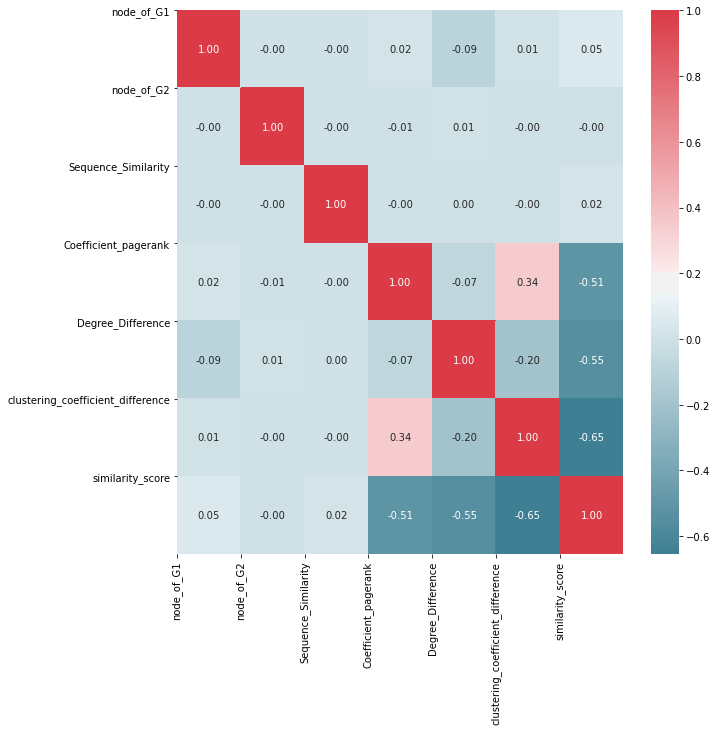

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#f=pd.DataFrame(X_train)
corr = f.corr()
   #Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

# Solve data Imbalance problem

# Resample 

In [72]:
from collections import Counter
from imblearn.combine import SMOTEENN

print('Original dataset shape %s' % Counter(y_train))
#sampling_strategy = 'not minority'
smt = SMOTEENN(random_state=42) #sampling_strategy=sampling_strategy)

X_res_train, y_res_train = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_train))   

Original dataset shape Counter({'No': 30946622, 'Yes': 244})
Resampled dataset shape Counter({'Yes': 30946521, 'No': 30670343})


In [73]:
print('Original dataset shape %s' % Counter(y_test))
smt = SMOTEENN(random_state=42)
X_res_test, y_res_test = smt.fit_resample(X_test, y_test)
print('Resampled dataset shape %s' % Counter(y_res_test))  

Original dataset shape Counter({'No': 3438520, 'Yes': 21})
Resampled dataset shape Counter({'Yes': 3438519, 'No': 3387561})


In [74]:
import numpy as np
X_res_train=np.array(X_res_train)
y_res_train=np.array(y_res_train)
X_res_test=np.array(X_res_test)
y_res_test=np.array(y_res_test)

In [75]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_res_train)
encoded_Y = encoder.transform(y_res_train)
# One Hot Encode
y_res_train = np_utils.to_categorical(encoded_Y)

In [76]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_res_test)
encoded_Y = encoder.transform(y_res_test)
# One Hot Encode
y_res_test = np_utils.to_categorical(encoded_Y)

# test model for real data

In [79]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# One Hot Encode
y_train = np_utils.to_categorical(encoded_Y)

In [80]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# One Hot Encode
y_test = np_utils.to_categorical(encoded_Y)

In [81]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# Phase 3: Architecture of LSTM-NA Network

# Train model with resample

In [77]:
from keras import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras import layers
import keras
callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=1,),
keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,)]

model_lstm = Sequential()

model_lstm.add(layers.Embedding(7, 8))
model_lstm.add(layers.LSTM(4))
model_lstm.add(Dense(2, activation='softmax'))
model_lstm.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc','mae','mse'])
model_lstm.summary()
history_lstm = model_lstm.fit(X_res_train, y_res_train,epochs=5,validation_split=0.2, callbacks=callbacks_list)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           56        
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 274
Trainable params: 274
Non-trainable params: 0
_________________________________________________________________


C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 49293491 samples, validate on 12323373 samples
Epoch 1/5
49293491/49293491 [==============================] - 11961s 243us/step - loss: 9.0256e-04 - acc: 0.9996 - mae: 6.7871e-04 - mse: 2.6235e-04 - val_loss: 1.4305e-05 - val_acc: 1.0000 - val_mae: 1.4304e-05 - val_mse: 2.0386e-10
Epoch 2/5
49293491/49293491 [==============================] - 12110s 246us/step - loss: 1.0690e-05 - acc: 1.0000 - mae: 1.0681e-05 - mse: 1.1741e-10 - val_loss: 1.1563e-05 - val_acc: 1.0000 - val_mae: 1.1607e-05 - val_mse: 1.3454e-10
Epoch 3/5
49293491/49293491 [==============================] - 11799s 239us/step - loss: 8.8006e-06 - acc: 1.0000 - mae: 8.8131e-06 - mse: 7.9842e-11 - val_loss: 9.8943e-06 - val_acc: 1.0000 - val_mae: 9.8339e-06 - val_mse: 9.7855e-11


In [78]:
# save model
import h5py
model_lstm.save('biogrid samples/deep_model_resample_lstm_SC-AT.h5')
model_lstm.save_weights('biogrid samples/deep_model_resample_lstm_weights_SC-AT.h5')

## test tune model for real data

In [85]:
from keras.models import load_model
#del model_onelstm
model_onelstm = load_model('biogrid samples/deep_model_resample_lstm_SC-AT.h5') 
model_onelstm.load_weights('biogrid samples/deep_model_resample_lstm_weights_SC-AT.h5', by_name=True) 

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [90]:
# without resample
result_tr = model_onelstm.evaluate(X_train, y_train)
result_tr

30946866/30946866 [==============================] - 2476s 80us/step


[6.914138189807659e-06, 1.0, 7.010517037997488e-06, 4.757451377290778e-11]

In [91]:
%%time
out_tr=model_onelstm.predict(X_train)
out_tr

Wall time: 24min 18s


array([[9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       ...,
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06]], dtype=float32)

In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train.argmax(axis=1), out_tr.argmax(axis=1)))

[[30946622        0]
 [       0      244]]


In [93]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_train.argmax(axis=1), out_tr.argmax(axis=1) , average="macro"))
print(recall_score(y_train.argmax(axis=1), out_tr.argmax(axis=1) , average="macro"))
print(f1_score(y_train.argmax(axis=1), out_tr.argmax(axis=1) , average="macro"))

1.0
1.0
1.0


In [86]:
# without resample
result_te = model_onelstm.evaluate(X_test, y_test)
result_te

3438541/3438541 [==============================] - 274s 80us/step


[6.914132893244596e-06, 1.0, 6.919158295204397e-06, 4.8043222178328904e-11]

In [87]:
%%time
out_te=model_onelstm.predict(X_test)
out_te

Wall time: 2min 43s


array([[9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       ...,
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06],
       [9.999931e-01, 6.943173e-06]], dtype=float32)

In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.argmax(axis=1), out_te.argmax(axis=1)))

[[3438520       0]
 [      0      21]]


In [89]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))
print(recall_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))
print(f1_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))

1.0
1.0
1.0
